# Merge data together

In [1]:
import pandas as pd
from pathlib import Path

def load_and_merge_csvs(data_folder: str, sep=';') -> pd.DataFrame:
    data_path = Path(data_folder)
    files = list(data_path.glob("*.csv"))
    ref_cols = pd.read_csv(files[0], sep=sep, nrows=0).columns

    df_list = []
    for f in files:
        df = pd.read_csv(f, sep=sep, skiprows=[1, 2])
        if list(df.columns) == list(ref_cols):
            df['source_file'] = f.name
            df_list.append(df)

    merged_df = pd.concat(df_list, ignore_index=True)
    return merged_df


In [2]:
data_folder = r"C:\Users\HP\Documents\Toegepaste Wiskunde\Predictive Maintenaince\TSG-Data-Group1\SVRM4 Ewon date\New Ewon4 Data"
df = load_and_merge_csvs(data_folder)
df.to_csv('Ewon4_Full_data')

In [4]:
df.shape

(340997, 47)

# EDA

In [5]:
# Algemene info
df.info()

# Eerste 5 rijen
df.head()

# Statistieken voor numerieke kolommen
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340997 entries, 0 to 340996
Data columns (total 47 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   TimeInt                                              340997 non-null  int64  
 1   TimeStr                                              340997 non-null  object 
 2   Act_Receptnummer                                     340997 non-null  int64  
 3   Active_nummer_wisselblok                             340997 non-null  int64  
 4   Pauze                                                340997 non-null  int64  
 5   StangData.Correctie_Totale_lengte                    340997 non-null  float64
 6   StangData.Correctie_Totale_lengte_operator_trek1en3  340997 non-null  float64
 7   StangData.Offset_knipklem_knippositie_Operator       340997 non-null  float64
 8   StangData.Pos-UitloCor_2_trek24                      3

TimeInt  Act_Receptnummer  Active_nummer_wisselblok  \
count  3.409970e+05     340997.000000             340997.000000   
mean   1.761891e+09        171.989610                  6.599310   
std    3.435951e+05        146.606592                  2.084996   
min    1.761291e+09         73.000000                  0.000000   
25%    1.761595e+09         74.000000                  5.000000   
50%    1.761892e+09         74.000000                  6.000000   
75%    1.762187e+09        301.000000                 10.000000   
max    1.762492e+09        500.000000                 10.000000   

               Pauze  StangData.Correctie_Totale_lengte  \
count  340997.000000                      340997.000000   
mean        0.310490                          -0.240963   
std         0.462695                           0.116309   
min         0.000000                          -0.500000   
25%         0.000000                          -0.400000   
50%         0.000000                          -0.200000   
75%         1.000000                          -0.200000   
max         1.000000                           0.100000   

       StangData.Correctie_Totale_lengte_operator_trek1en3  \
count                                      340997.000000     
mean                                            0.400475     
std                                             0.332752     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.300000     
75%                                             0.700000     
max                                             1.000000     

       StangData.Offset_knipklem_knippositie_Operator  \
count                                   340997.000000   
mean                                        -0.259465   
std                                          5.430175   
min                                        -13.300000   
25%                                         -3.500000   
50%                                         -1.000000   
75%                                          1.500000   
max                                          9.400000   

       StangData.Pos-UitloCor_2_trek24  StangData.Pos_inloCor_1_trek13  \
count                    340997.000000                   340997.000000   
mean                          0.587807                       -0.168377   
std                           3.502878                        1.753841   
min                          -5.100000                       -3.000000   
25%                          -3.200000                       -3.000000   
50%                          -0.400000                        0.700000   
75%                           4.200000                        1.100000   
max                           6.000000                        1.300000   

       StangData.Pos_inloCor_1_trek24  ...     knipteller  negeer_stangkwijt  \
count                   340997.000000  ...  340997.000000      340997.000000   
mean                         0.503232  ...    3965.768291           0.886738   
std                          3.182384  ...    2384.683835           0.316913   
min                         -3.500000  ...       0.000000           0.000000   
25%                         -3.500000  ...    1536.000000           1.000000   
50%                          0.200000  ...    4052.000000           1.000000   
75%                          2.000000  ...    5342.000000           1.000000   
max                          5.600000  ...    9999.000000           1.000000   

       onbekende_stang    stang_kwijt     stangbuf_2    stangbuff_0  \
count         340997.0  340997.000000  340997.000000  340997.000000   
mean               0.0       0.021921      85.153828     199.547474   
std                0.0       0.146426     376.359053     476.649385   
min                0.0       0.000000       0.000000       0.000000   
25%                0.0       0.000000       0.000000       0

In [6]:
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

Series([], dtype: int64)

In [6]:
# Numeriek
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Categorieën
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
num_cols, cat_cols

(['TimeInt',
  'Act_Receptnummer',
  'Active_nummer_wisselblok',
  'Pauze',
  'StangData.Correctie_Totale_lengte',
  'StangData.Correctie_Totale_lengte_operator_trek1en3',
  'StangData.Offset_knipklem_knippositie_Operator',
  'StangData.Pos-UitloCor_2_trek24',
  'StangData.Pos_inloCor_1_trek13',
  'StangData.Pos_inloCor_1_trek24',
  'StangData.Pos_inloCor_2_trek13',
  'StangData.Pos_inloCor_2_trek24',
  'StangData.Pos_uitloCor_1_trek13',
  'StangData.Pos_uitloCor_1_trek24',
  'StangData.Pos_uitloCor_2_trek13',
  'StangData.d_hor',
  'StangData.d_vert',
  'StangHistorie[1].b_gem',
  'StangHistorie[1].d_gem',
  'Stangbuf_3',
  'VU-Center_hor',
  'VU-center-vert',
  'Wisselblok_settings[6].Wp1_diameter_offset',
  'Wisselblok_settings[6].Wp1_hartlijn_offset',
  'Wisselblok_settings[6].Wp2_diameter_offset',
  'Wisselblok_settings[6].Wp2_hartlijn_offset',
  'bufferlevel',
  'd_hor_offset',
  'd_vert_offset',
  'goedgekeurd',
  'knipteller',
  'negeer_stangkwijt',
  'onbekende_stang',
  'stan

In [33]:
import matplotlib.pyplot as plt

# Zorg dat TimeInt gebruikt wordt als tijd
# Als het integer is (bijv. 202511101234) kun je het eventueel naar datetime converteren
# anders gebruiken we het gewoon als x-as
time_col = 'TimeInt'

# lijst van numerieke kolommen (zonder target)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('goedgekeurd')


In [34]:
const_flags = pd.DataFrame(index=df.index)

for col in num_cols:
    const_flags[col+'_constant'] = df[col].diff().fillna(0).abs() < 1e-3

In [35]:
const_flags

TimeInt_constant  Act_Receptnummer_constant  \
0                   True                       True   
1                  False                       True   
2                  False                       True   
3                  False                       True   
4                  False                       True   
...                  ...                        ...   
340992             False                       True   
340993             False                       True   
340994             False                       True   
340995             False                       True   
340996             False                       True   

        Active_nummer_wisselblok_constant  Pauze_constant  \
0                                    True            True   
1                                    True            True   
2                                    True            True   
3                                    True            True   
4                                    True            True   
...                                   ...             ...   
340992                               True            True   
340993                               True            True   
340994                               True            True   
340995                               True            True   
340996                               True            True   

        StangData.Correctie_Totale_lengte_constant  \
0                                             True   
1                                             True   
2                                             True   
3                                             True   
4                                             True   
...                                            ...   
340992                                        True   
340993                                        True   
340994                                        True   
340995                                        True   
340996                                        True   

        StangData.Correctie_Totale_lengte_operator_trek1en3_constant  \
0                                                    True              
1                                                    True              
2                                                    True              
3                                                    True              
4                                                    True              
...                                                   ...              
340992                                               True              
340993                                               True              
340994                                               True              
340995                                               True              
340996                                               True              

        StangData.Offset_knipklem_knippositie_Operator_constant  \
0                                                    True         
1                                                    True         
2                                                    True         
3                                                    True         
4                                                    True         
...                                                   ...         
340992                                               True         
340993                                               True         
340994                                               True         
340995                                               True         
340996                                               True         

        StangData.Pos-UitloCor_2_trek24_constant  \
0                                           True   
1                                           True   
2                                           True   
3                                           True   
4                                  

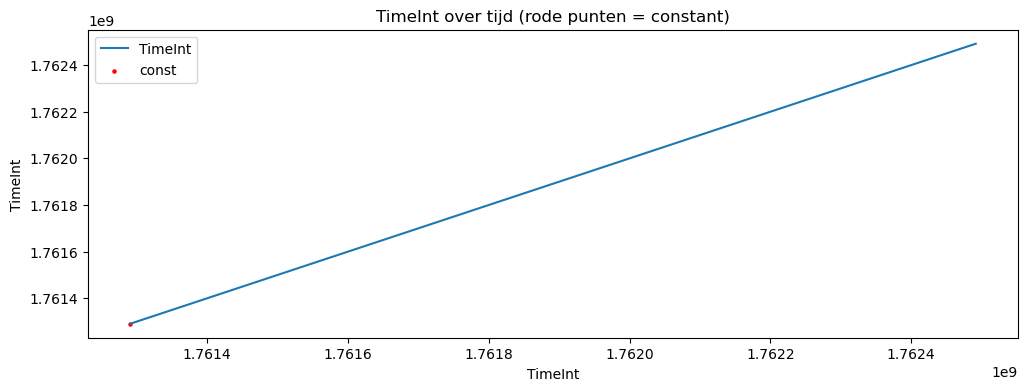

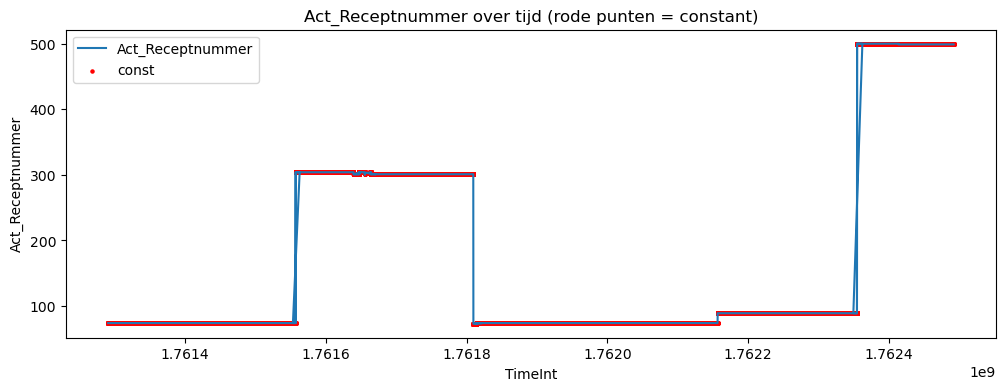

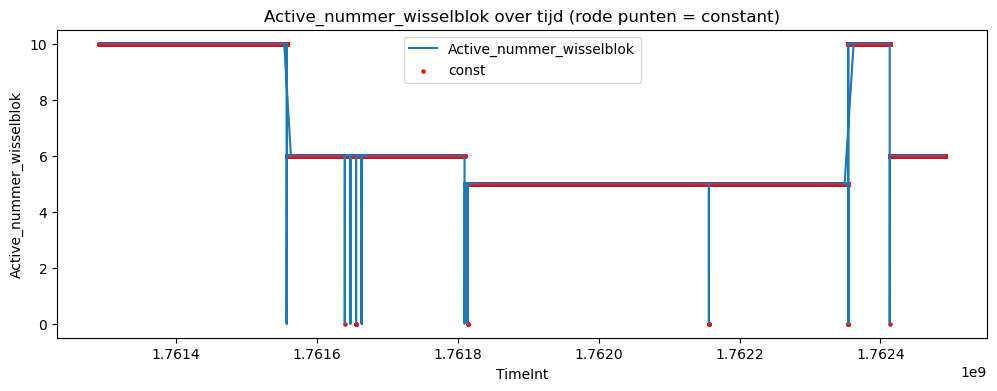

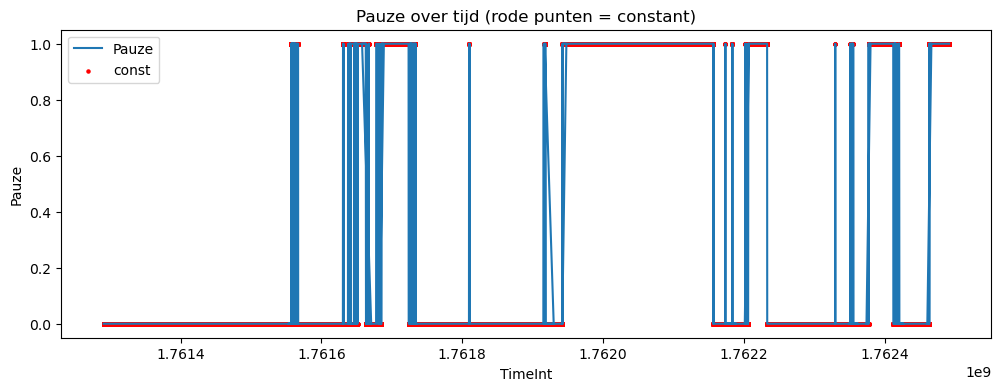

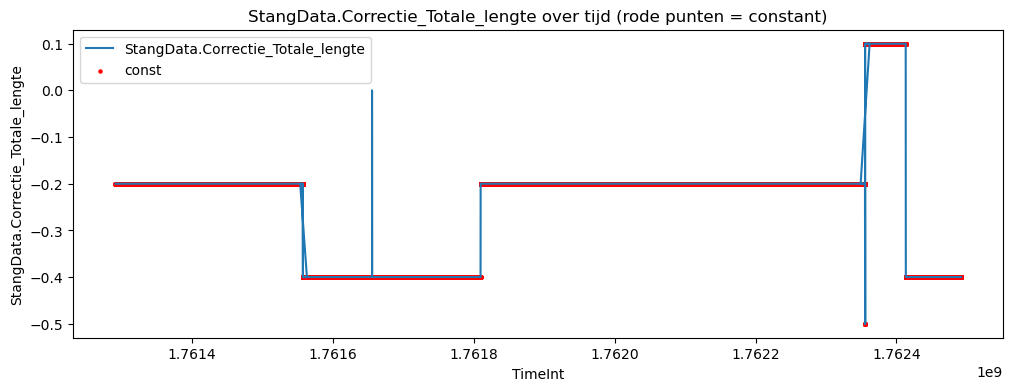

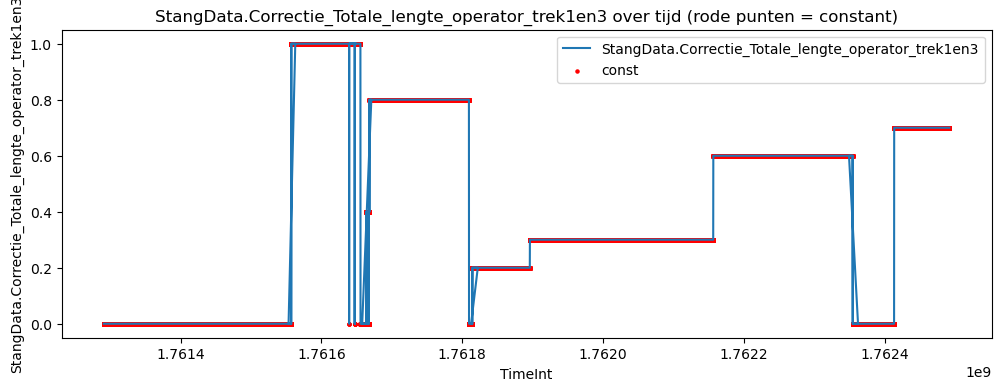

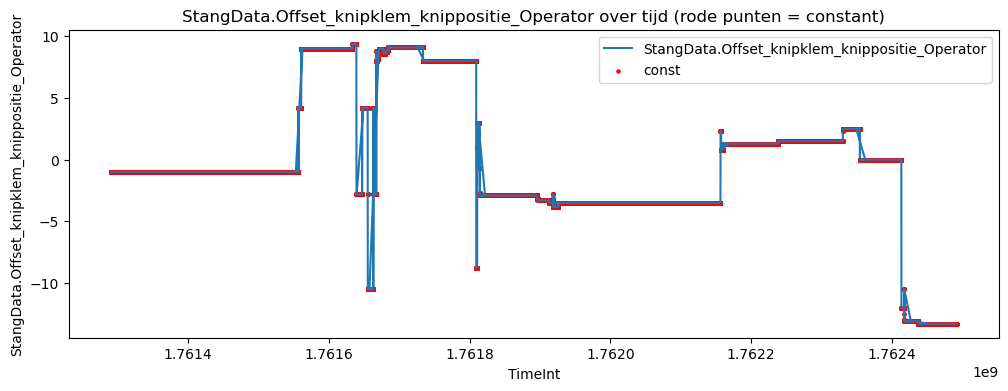

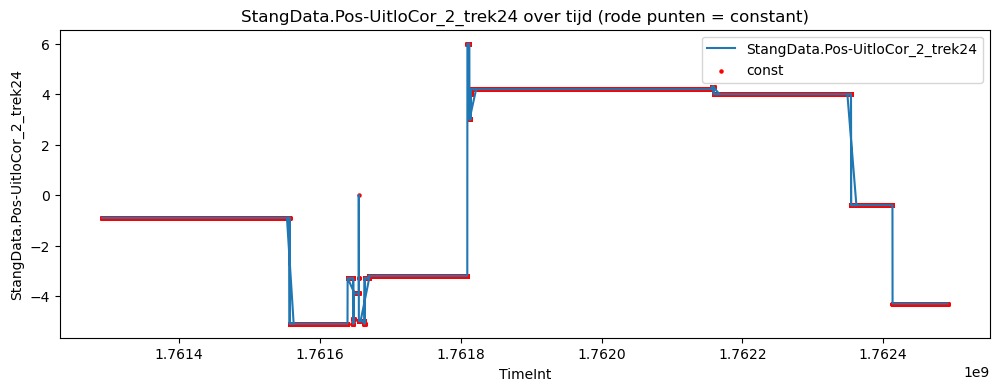

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


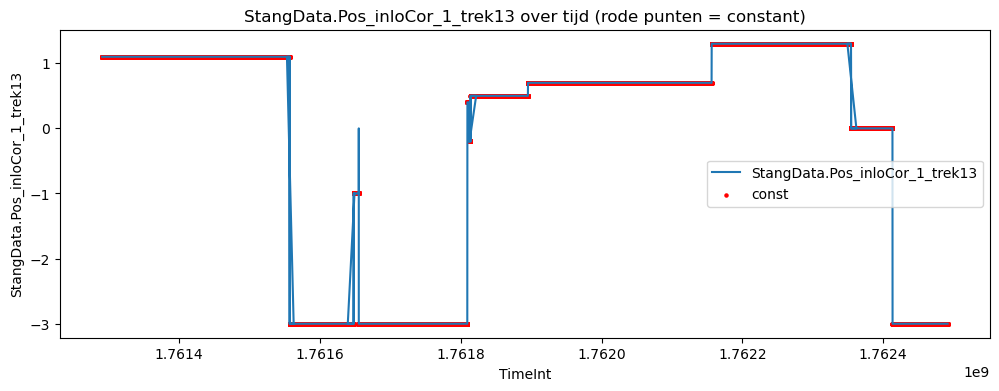

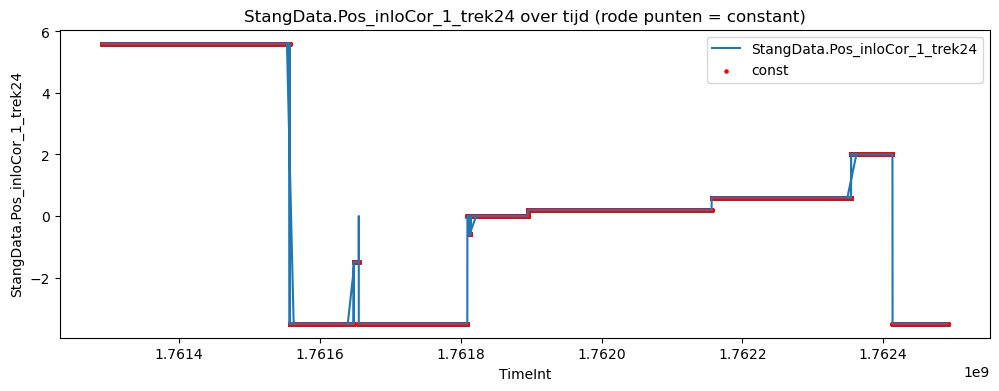

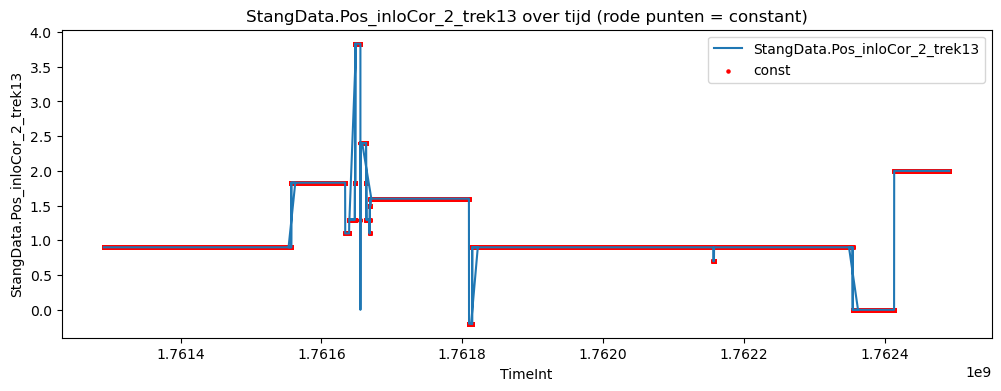

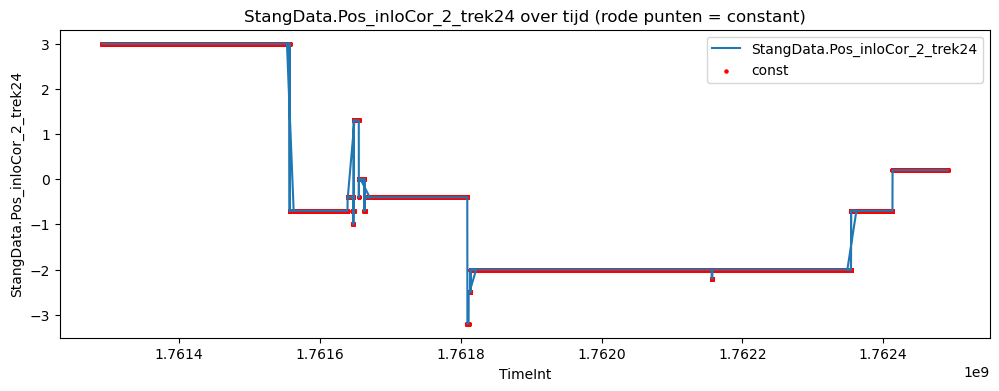

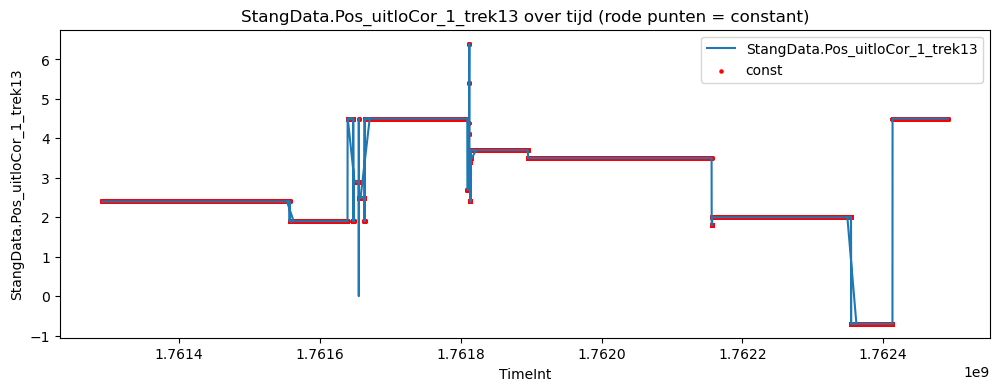

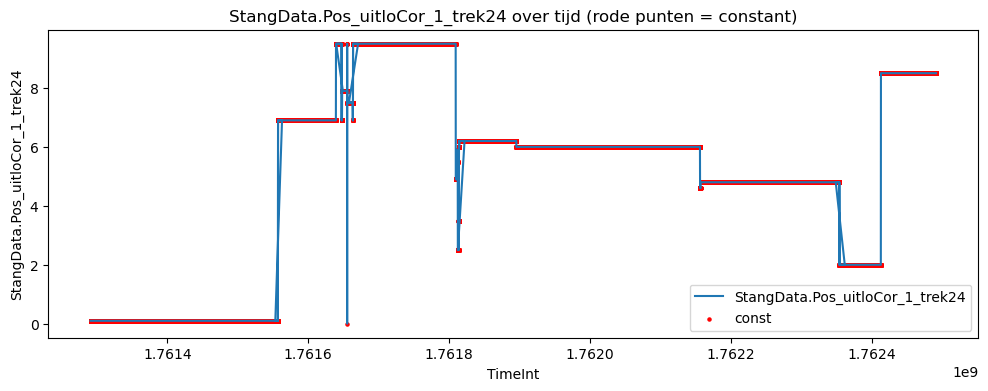

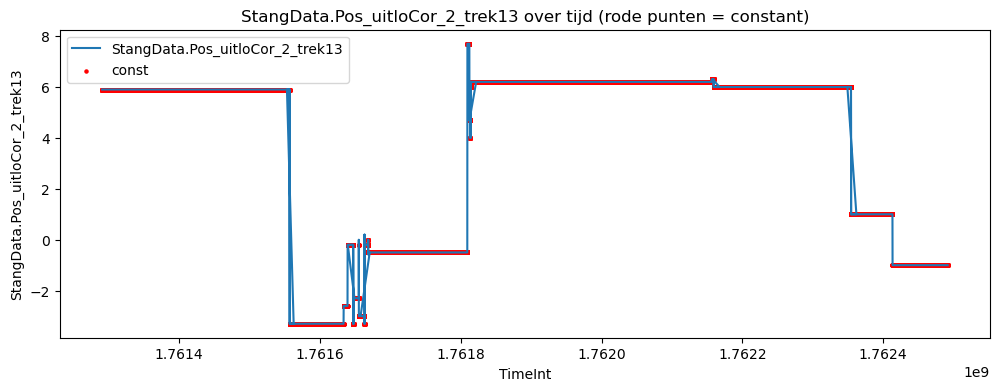

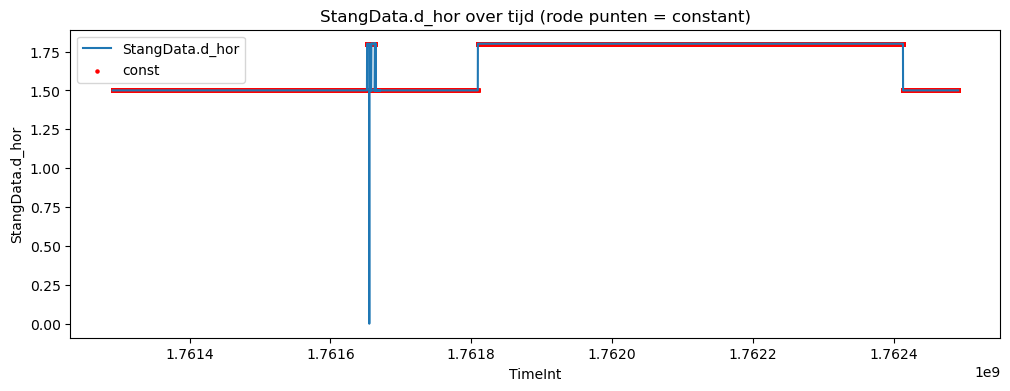

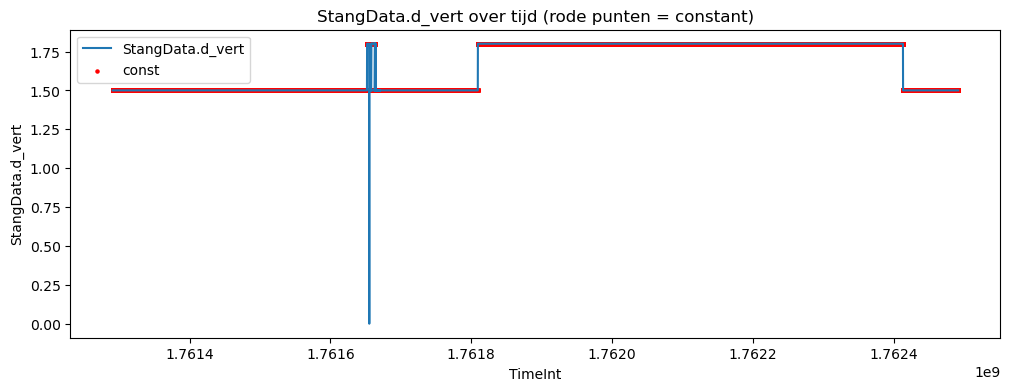

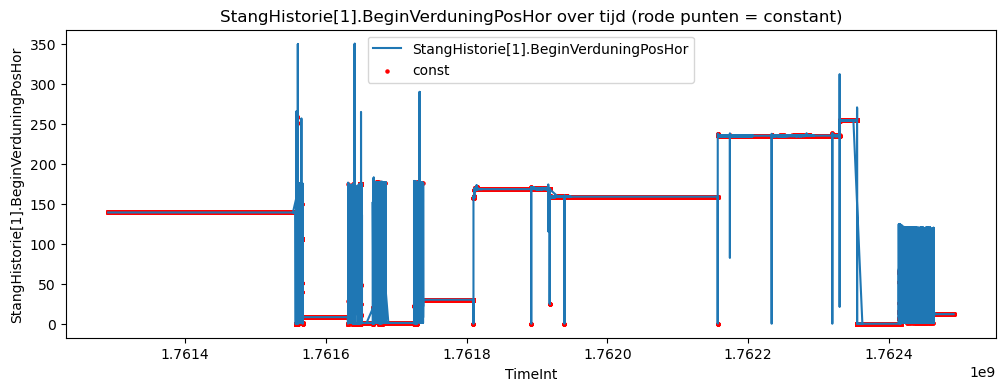

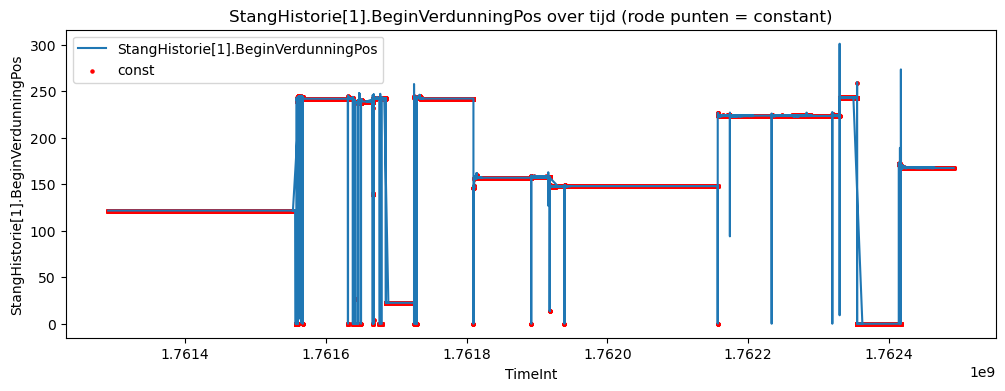

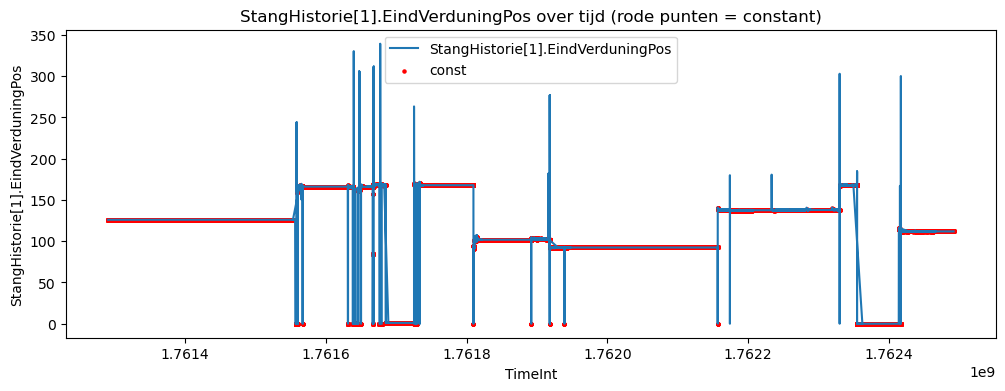

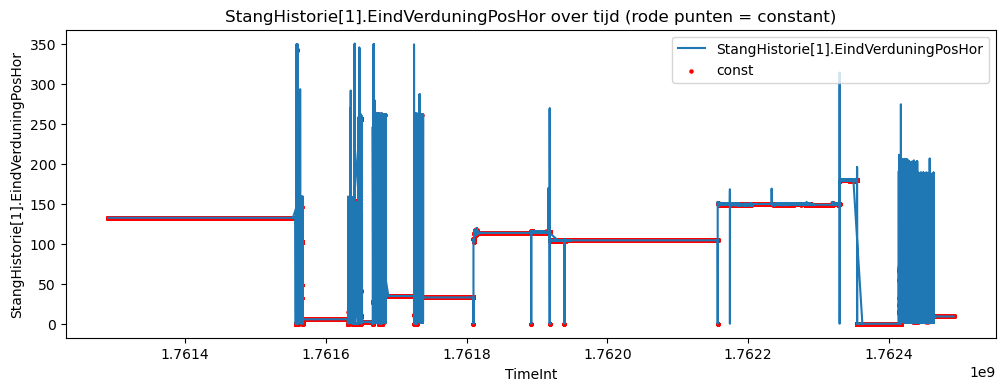

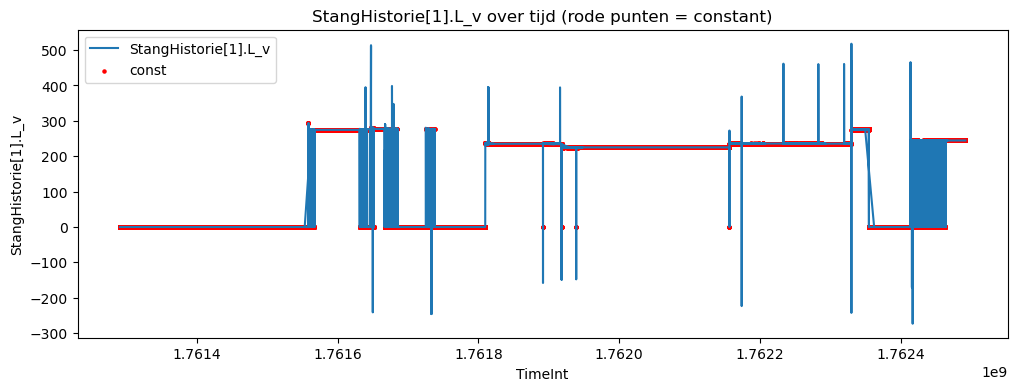

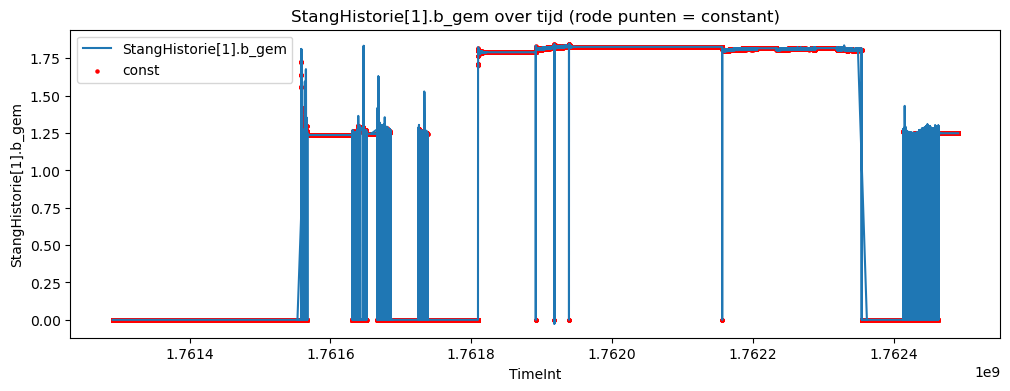

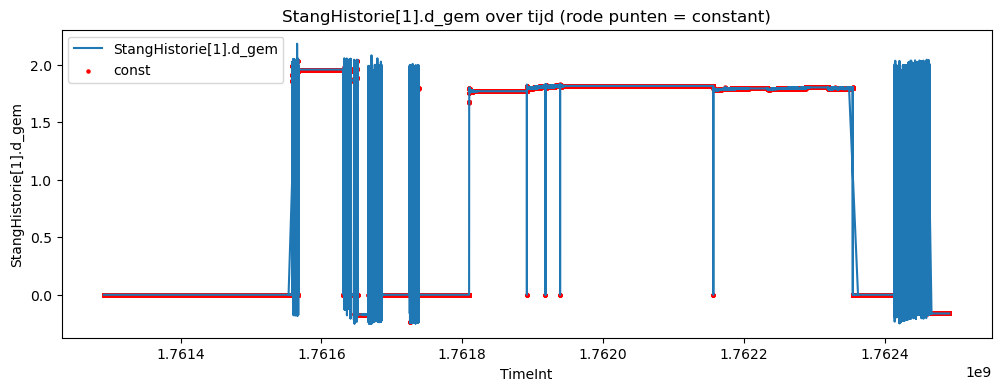

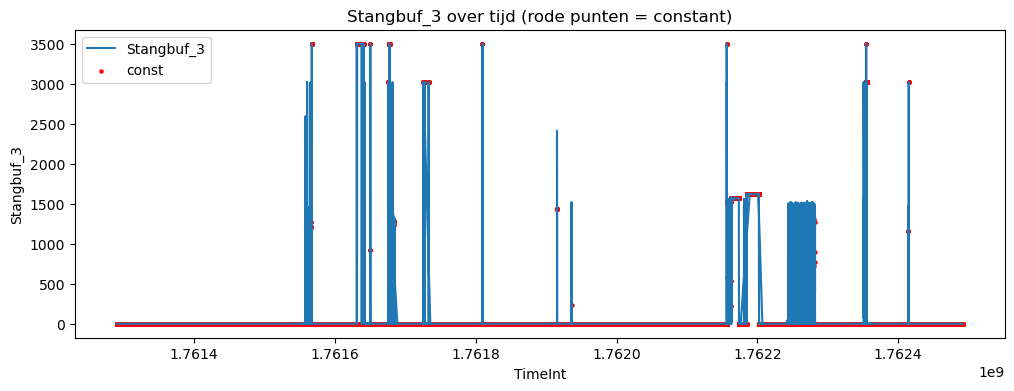

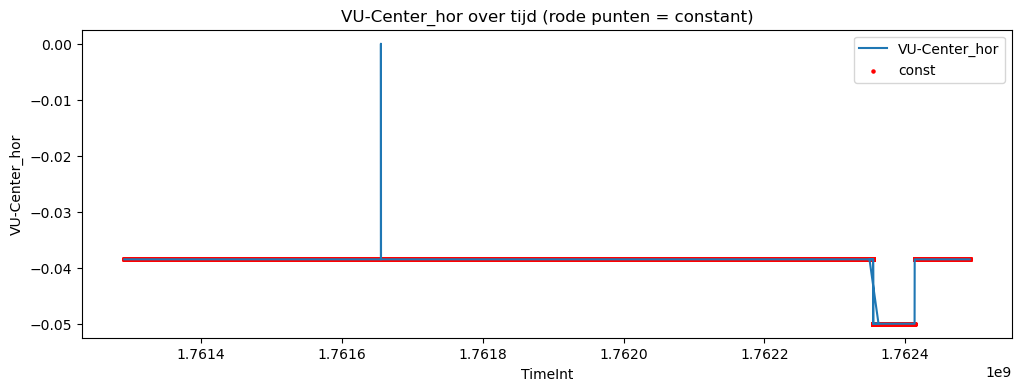

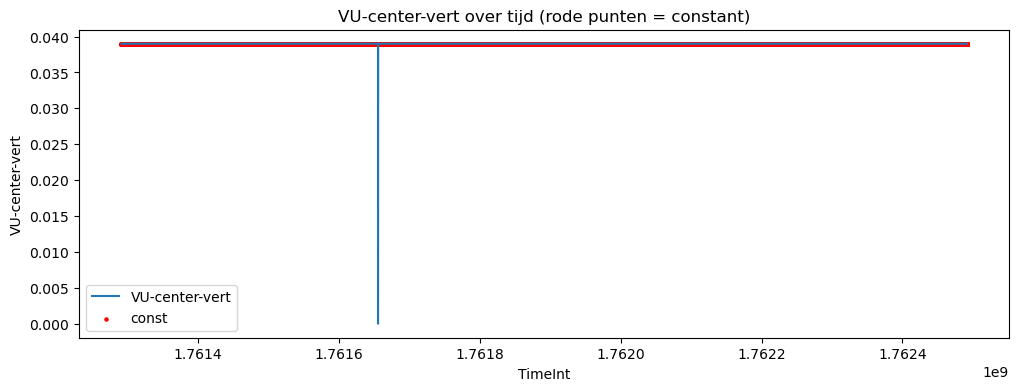

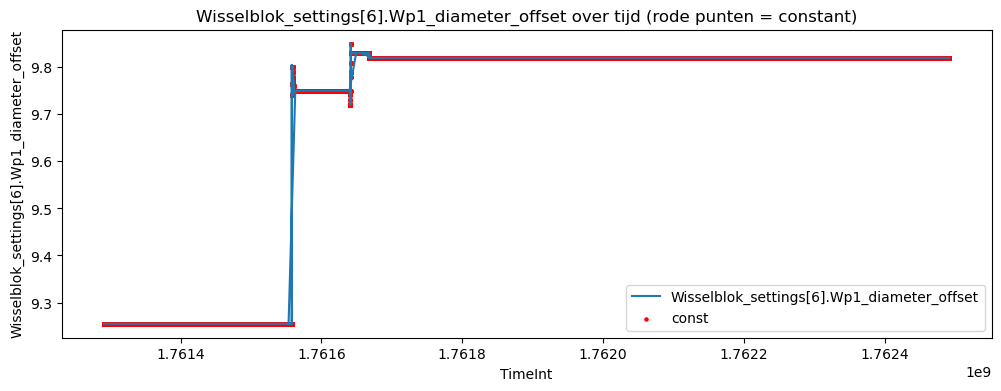

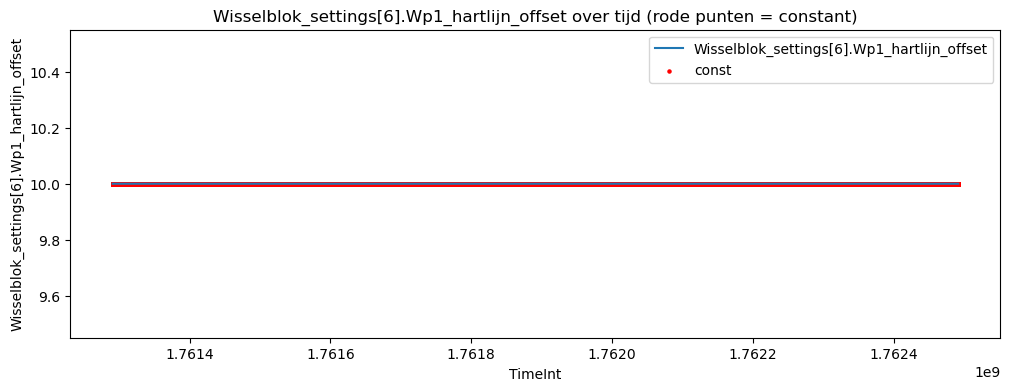

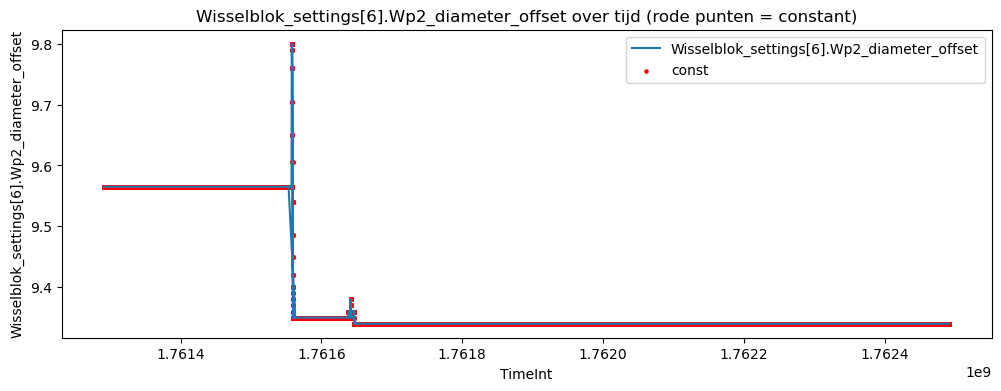

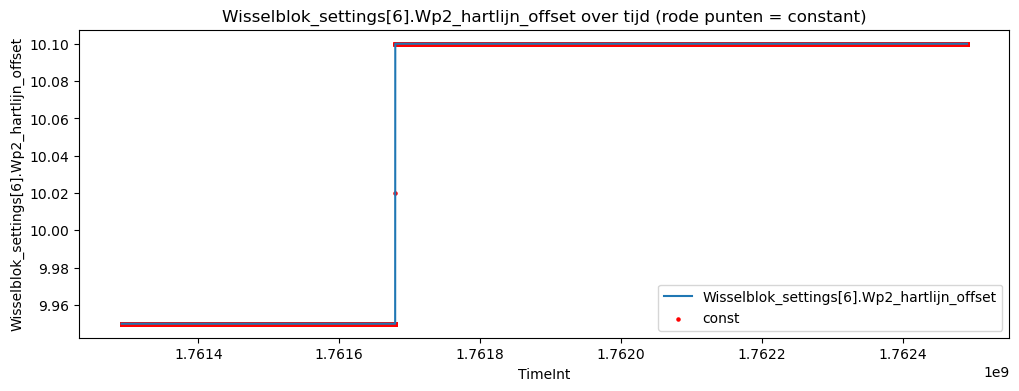

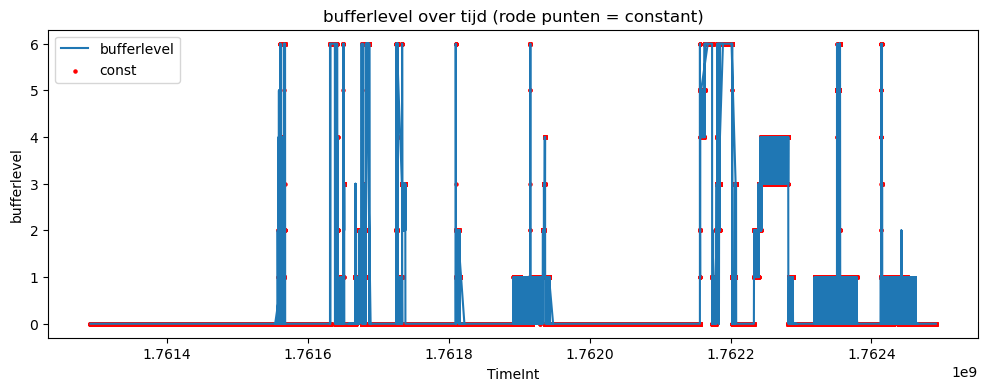

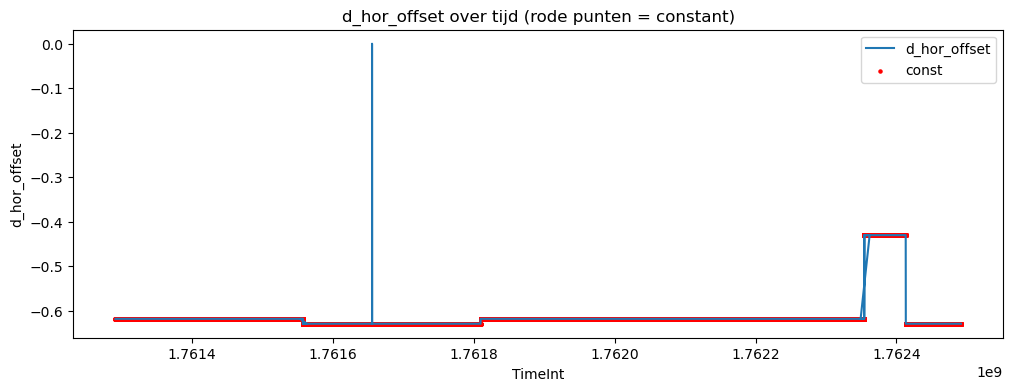

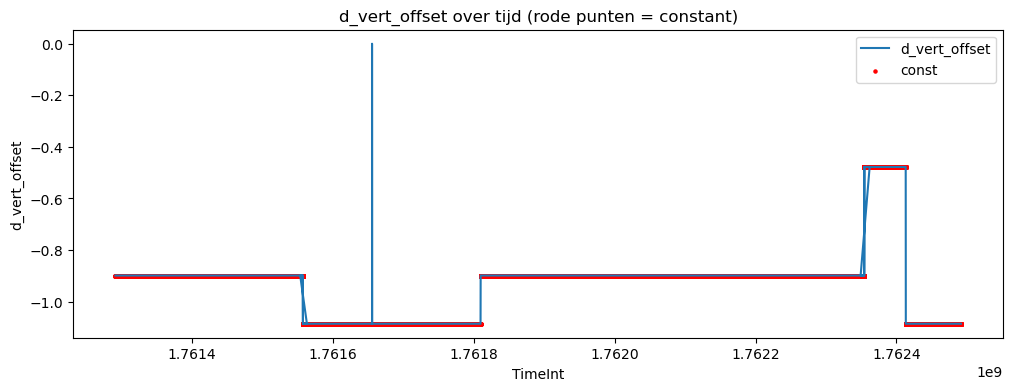

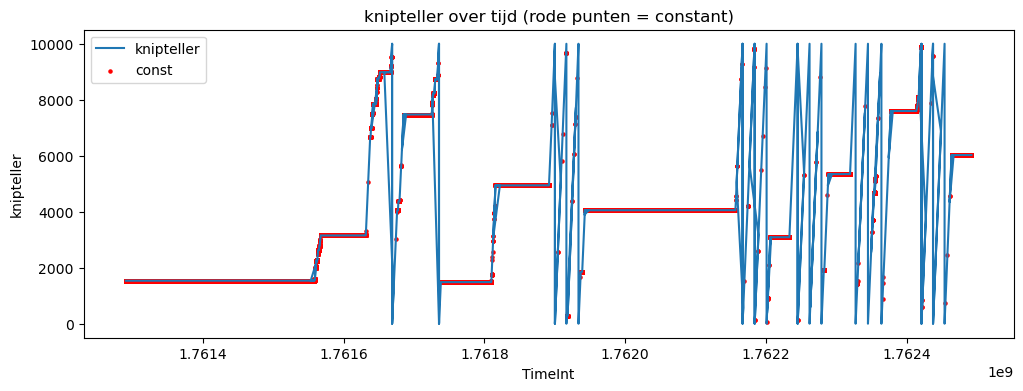

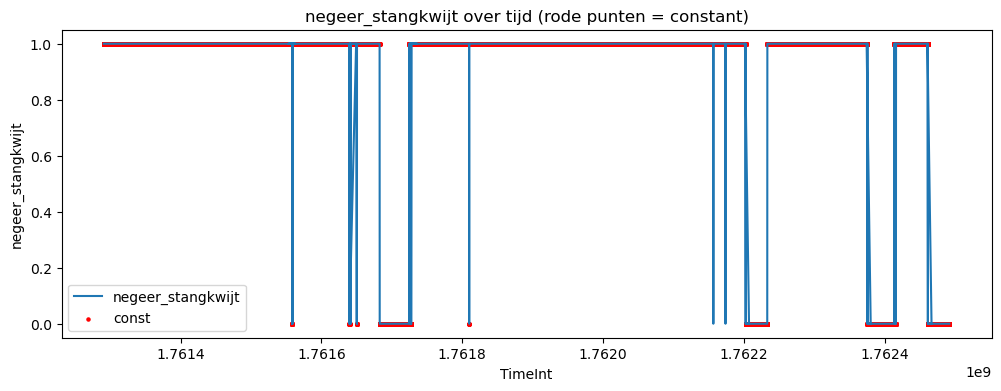

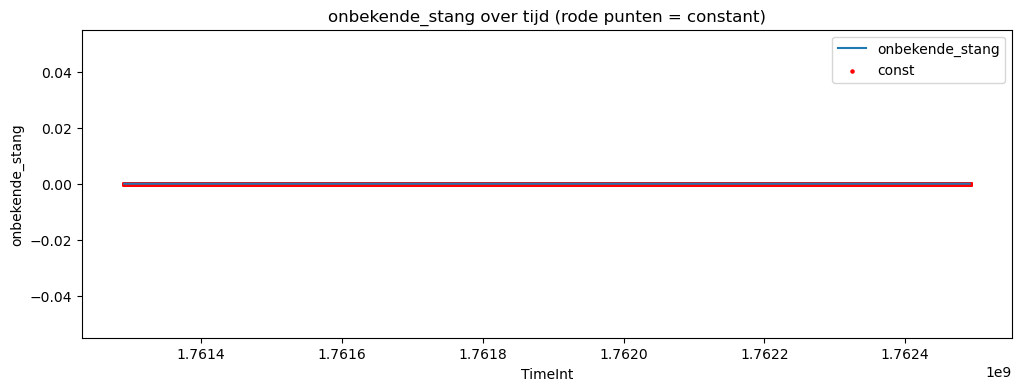

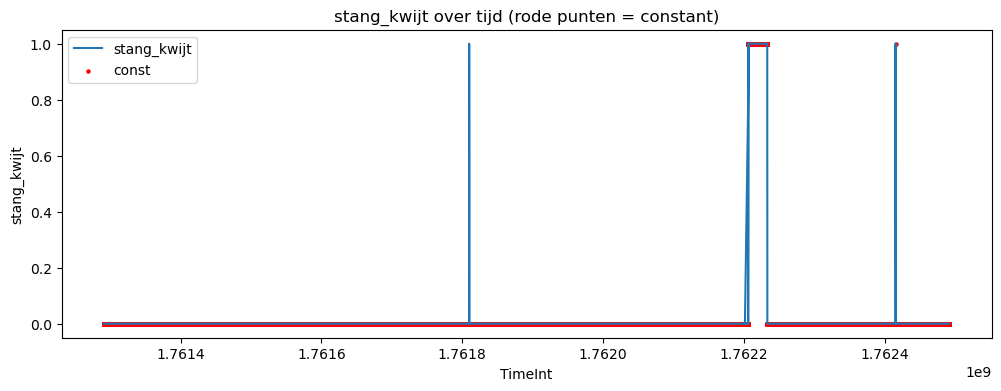

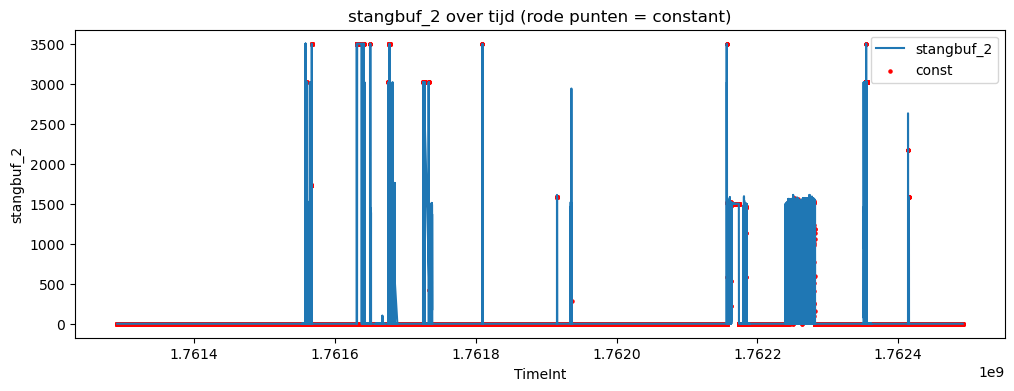

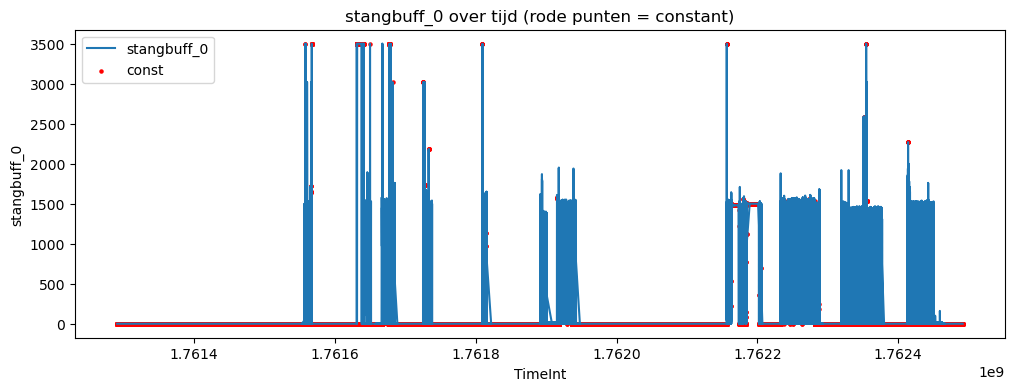

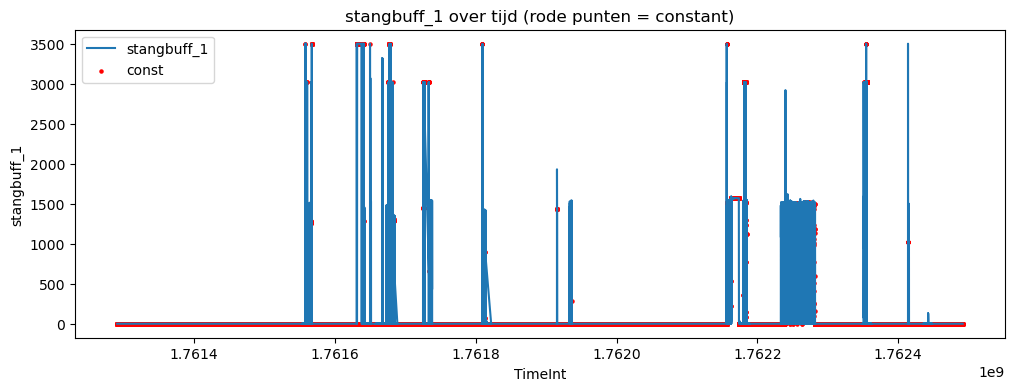

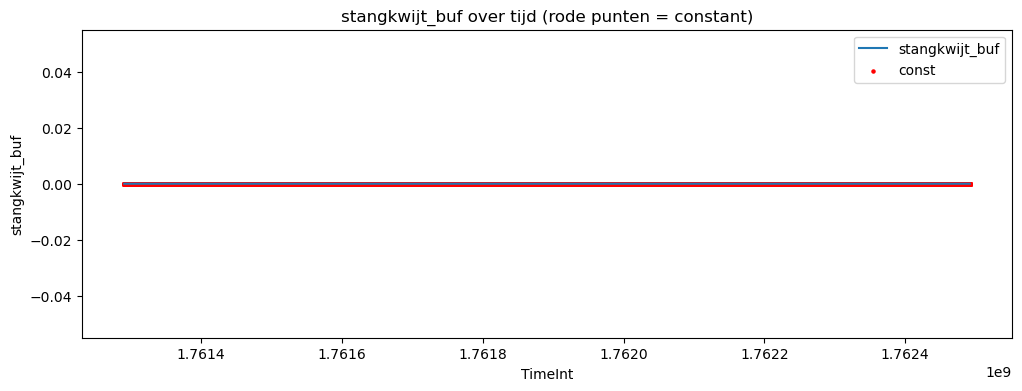

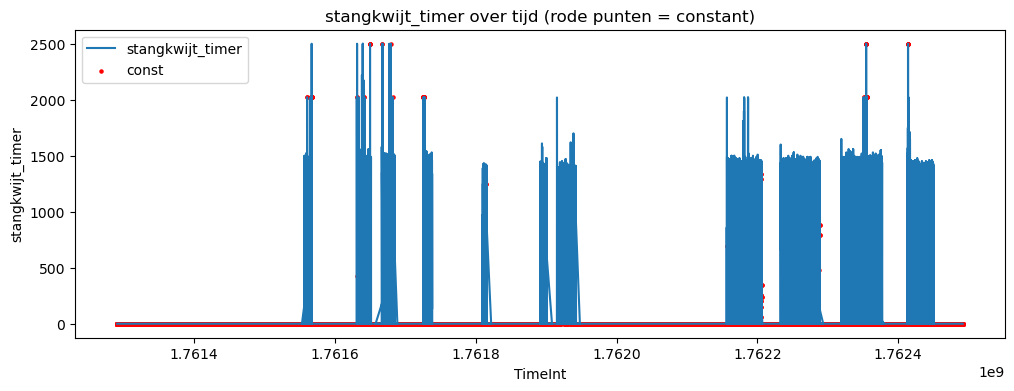

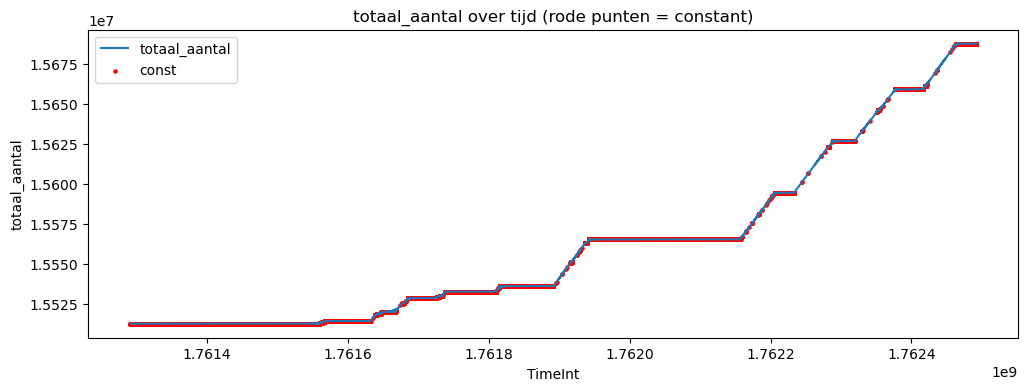

In [36]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.plot(df[time_col], df[col], label=col)
    
    # optioneel: markeer constant-perioden
    const_periods = const_flags[col+'_constant']
    plt.scatter(df[time_col][const_periods], df[col][const_periods], color='red', s=5, label='const')
    
    plt.xlabel(time_col)
    plt.ylabel(col)
    plt.title(f'{col} over tijd (rode punten = constant)')
    plt.legend()
    plt.show()
    


KeyboardInterrupt



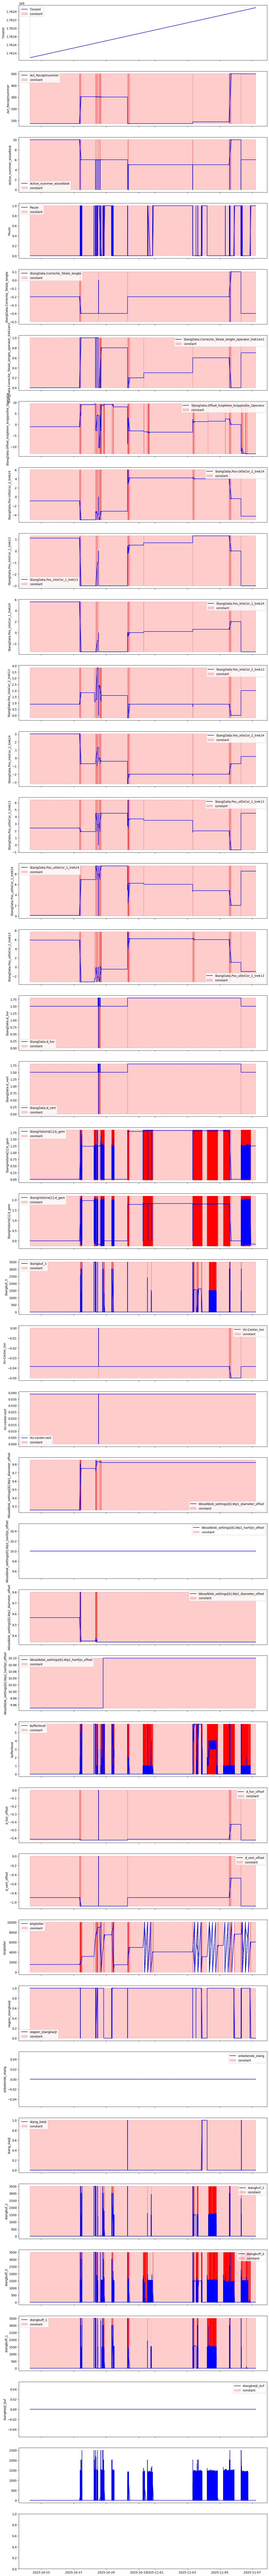

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optioneel: converteer TimeInt naar datetime als het in formaat YYYYMMDDHHMM staat
df['Time'] = pd.to_datetime(df['TimeInt'], unit='s')

# Lijst van numerieke kolommen zonder target
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('goedgekeurd')

# Detecteer constant-perioden
const_flags = pd.DataFrame(index=df.index)
for col in num_cols:
    const_flags[col+'_constant'] = df[col].diff().fillna(0).abs() < 1e-3

# Maak overzichtelijke subplots
fig, axes = plt.subplots(len(num_cols), 1, figsize=(15, 4*len(num_cols)), sharex=True)

if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    ax.plot(df['Time'], df[col], label=col, color='blue')

    # Visualiseer constant-perioden als achtergrondkleur
    const_periods = const_flags[col+'_constant']
    ax.fill_between(df['Time'], df[col].min(), df[col].max(),
                    where=const_periods,
                    color='red', alpha=0.2, label='constant')

    ax.set_ylabel(col)
    ax.legend()

axes[-1].set_xlabel('Time')
plt.suptitle('Numerieke kolommen over tijd (rode achtergrond = constant)')
plt.tight_layout()
plt.show()

# Target Variable

Target variable 'goedgekeurd' analyse:
Aantal unieke waarden: 28527
Waarden: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 20

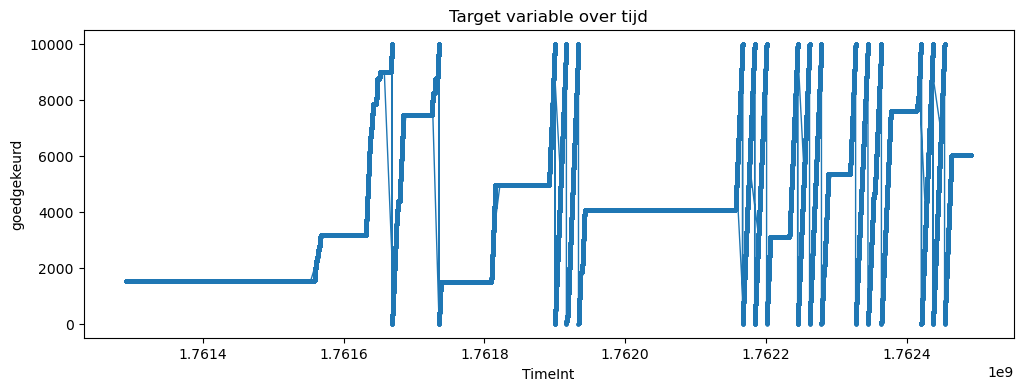

In [10]:
# Analyseer de target variable
print("Target variable 'goedgekeurd' analyse:")
print(f"Aantal unieke waarden: {df['goedgekeurd'].nunique()}")
print(f"Waarden: {sorted(df['goedgekeurd'].unique())}")
print(f"Value counts:\n{df['goedgekeurd'].value_counts().sort_index()}")

# Plot de target over tijd
plt.figure(figsize=(12, 4))
plt.plot(df['TimeInt'], df['knipteller'], marker='o', markersize=2, linewidth=1)
plt.xlabel('TimeInt')
plt.ylabel('goedgekeurd')
plt.title('Target variable over tijd')
plt.show()

=== TARGET VARIABLE ANALYSE ===
Unieke waarden: [ 7681  7682  7683 ... 27597 27600 27603]
Value counts:
0        314
1        494
2        824
3         28
4         19
        ... 
52269      2
52272      2
52275      2
52278      2
52281      2
Name: goedgekeurd, Length: 28527, dtype: int64
Is constant? False
Aantal keer dat target verandert: 86067
Veranderpunten: [1761557021, 1761557027, 1761557031, 1761558231, 1761558316, 1761558321, 1761558571, 1761558666, 1761558711, 1761558716, 1761558721, 1761558726, 1761558796, 1761558801, 1761558806, 1761558811, 1761558861, 1761558866, 1761558871, 1761558876, 1761559031, 1761559036, 1761559041, 1761559046, 1761559086, 1761559091, 1761559096, 1761559101, 1761559141, 1761559146, 1761559151, 1761559156, 1761559161, 1761559166, 1761559171, 1761559216, 1761559221, 1761559226, 1761559231, 1761559236, 1761559346, 1761559351, 1761559356, 1761559361, 1761559366, 1761559371, 1761559376, 1761559381, 1761559386, 1761559391, 1761559397, 1761559401, 176155

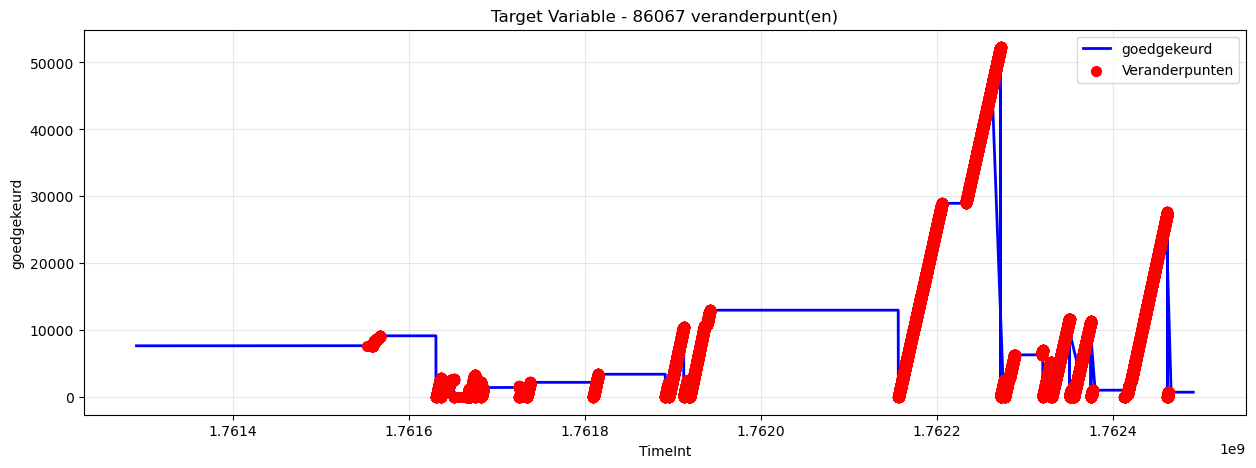

In [47]:
# Diepere analyse van de target
print(f"Unieke waarden: {df['goedgekeurd'].unique()}")
print(f"Value counts:\n{df['goedgekeurd'].value_counts().sort_index()}")
print(f"Is constant? {df['goedgekeurd'].nunique() == 1}")

# Check of de target verandert
target_changes = df['goedgekeurd'].diff().fillna(0)
change_points = target_changes != 0
print(f"Aantal keer dat target verandert: {change_points.sum()}")
print(f"Veranderpunten: {df['TimeInt'][change_points].tolist() if change_points.any() else 'Geen veranderingen'}")

# Plot target met eventuele veranderingen
plt.figure(figsize=(15, 5))
plt.plot(df['TimeInt'], df['goedgekeurd'], 'b-', label='goedgekeurd', linewidth=2)

if change_points.any():
    plt.scatter(df['TimeInt'][change_points], df['goedgekeurd'][change_points], 
                color='red', s=50, zorder=5, label='Veranderpunten')
    
plt.xlabel('TimeInt')
plt.ylabel('goedgekeurd')
plt.title(f'Target Variable - {change_points.sum()} veranderpunt(en)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [52]:
# Eerste vraag: Wat betekent deze data eigenlijk?
print("=== DATA VERKENNING ===")
print(f"Aantal rijen: {len(df)}")
print(f"Aantal kolommen: {len(df.columns)}")
print(f"Periode: {df['TimeInt'].min()} tot {df['TimeInt'].max()}")

# Wat zijn dit voor metingen?
print("\n=== SOORTEN KOLOMMEN ===")
print("Tellingen/Counters:")
count_cols = [col for col in df.columns if 'teller' in col.lower() or 'aantal' in col.lower() or 'nummer' in col.lower()]
print(f"  {count_cols}")

print("\nStatus/State variabelen:")
state_cols = [col for col in df.columns if 'pauze' in col.lower() or 'buffer' in col.lower() or 'buf' in col.lower()]
print(f"  {state_cols}")

print("\nSensor metingen:")
sensor_cols = [col for col in df.columns if 'stang' in col.lower() or 'pos' in col.lower() or 'offset' in col.lower()]
print(f"  {sensor_cols[:5]}...")  # eerste 5

print("\nOnbekend:")
other_cols = [col for col in df.columns if col not in count_cols + state_cols + sensor_cols and col not in ['goedgekeurd', 'TimeInt', 'TimeStr', 'Time']]
print(f"  {other_cols}")

=== DATA VERKENNING ===
Aantal rijen: 340997
Aantal kolommen: 49
Periode: 1761290871 tot 1762491596

=== SOORTEN KOLOMMEN ===
Tellingen/Counters:
  ['Act_Receptnummer', 'Active_nummer_wisselblok', 'knipteller', 'totaal_aantal']

Status/State variabelen:
  ['Pauze', 'Stangbuf_3', 'bufferlevel', 'stangbuf_2', 'stangbuff_0', 'stangbuff_1', 'stangkwijt_buf']

Sensor metingen:
  ['StangData.Correctie_Totale_lengte', 'StangData.Correctie_Totale_lengte_operator_trek1en3', 'StangData.Offset_knipklem_knippositie_Operator', 'StangData.Pos-UitloCor_2_trek24', 'StangData.Pos_inloCor_1_trek13']...

Onbekend:
  ['VU-Center_hor', 'VU-center-vert', 'source_file', 'is_constant']


=== TARGET ANALYSE ===
Unieke waarden: [ 7681  7682  7683 ... 27597 27600 27603]
Value counts:
0        314
1        494
2        824
3         28
4         19
        ... 
52269      2
52272      2
52275      2
52278      2
52281      2
Name: goedgekeurd, Length: 28527, dtype: int64


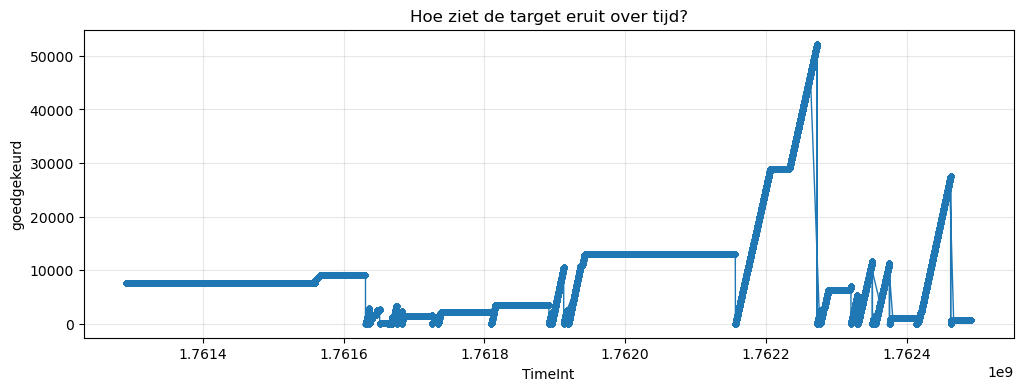

Target verandert op 86067 punten

Rond tijd 1761557021:
  Target wordt: 7682
  Pauze: 0
  knipteller: 1536
  stang_kwijt: 0
  totaal_aantal: 15512947

Rond tijd 1761557027:
  Target wordt: 7683
  Pauze: 0
  knipteller: 1538
  stang_kwijt: 0
  totaal_aantal: 15512948

Rond tijd 1761557031:
  Target wordt: 7684
  Pauze: 1
  knipteller: 1539
  stang_kwijt: 0
  totaal_aantal: 15512950


In [53]:
# Wat betekent "goedgekeurd"?
print("=== TARGET ANALYSE ===")
print(f"Unieke waarden: {df['goedgekeurd'].unique()}")
print(f"Value counts:\n{df['goedgekeurd'].value_counts().sort_index()}")

# Plot de target over tijd
plt.figure(figsize=(12, 4))
plt.plot(df['TimeInt'], df['goedgekeurd'], 'o-', markersize=3, linewidth=1)
plt.xlabel('TimeInt')
plt.ylabel('goedgekeurd')
plt.title('Hoe ziet de target eruit over tijd?')
plt.grid(True, alpha=0.3)
plt.show()

# Kijk naar gebeurtenissen wanneer target verandert
target_changes = df['goedgekeurd'].diff().fillna(0) != 0
if target_changes.any():
    print(f"Target verandert op {target_changes.sum()} punten")
    
    # Toon wat er gebeurt rond veranderpunten
    for idx in df[target_changes].index[:3]:  # eerste 3 veranderingen
        print(f"\nRond tijd {df.loc[idx, 'TimeInt']}:")
        print(f"  Target wordt: {df.loc[idx, 'goedgekeurd']}")
        # Toon andere variabelen die mogelijk veranderen
        for col in ['Pauze', 'knipteller', 'stang_kwijt', 'totaal_aantal']:
            if col in df.columns:
                print(f"  {col}: {df.loc[idx, col]}")

In [54]:
# Beantwoord deze vragen over je data:

# 1. Is dit productie/data van een machine?
print("1. Machine status analyse:")
if 'Pauze' in df.columns:
    print(f"   Pauze status: {df['Pauze'].unique()}")

# 2. Zijn er foutcondities?
print("\n2. Foutcondities:")
if 'stang_kwijt' in df.columns:
    print(f"   Stang kwijt: {df['stang_kwijt'].unique()}")

# 3. Wat zijn de belangrijkste tellers?
print("\n3. Belangrijkste tellers:")
for col in ['knipteller', 'totaal_aantal']:
    if col in df.columns:
        print(f"   {col}: {df[col].min()} -> {df[col].max()} (verschil: {df[col].max() - df[col].min()})")

# 4. Zijn er patronen in de tijd?
print("\n4. Tijd patronen:")
time_diff = df['TimeInt'].diff()
print(f"   Gemiddelde tijd tussen metingen: {time_diff.mean():.1f}")
print(f"   Tijd range: {time_diff.min()} tot {time_diff.max()}")

1. Machine status analyse:
   Pauze status: [0 1]

2. Foutcondities:
   Stang kwijt: [0 1]

3. Belangrijkste tellers:
   knipteller: 0 -> 9999 (verschil: 9999)
   totaal_aantal: 15512946 -> 15687455 (verschil: 174509)

4. Tijd patronen:
   Gemiddelde tijd tussen metingen: 3.5
   Tijd range: -13190.0 tot 6.0


In [55]:
# De echte target zou moeten zijn: "gaat er binnenkort een product goedgekeurd worden?"
# Laten we voorspellen wanneer de volgende goedkeuring komt

# Maak een binary target: wordt de goedgekeurd-teller binnen X metingen verhoogd?
df = df.sort_values('TimeInt')  # zorg dat data chronologisch is

# Target: wordt goedgekeurd binnen de komende 10 metingen verhoogd?
future_increases = []
for i in range(len(df)):
    current_value = df['goedgekeurd'].iloc[i]
    # Kijk vooruit of de teller binnen 10 stappen omhoog gaat
    look_ahead = min(10, len(df) - i - 1)
    future_values = [df['goedgekeurd'].iloc[i + j] for j in range(1, look_ahead + 1)]
    will_increase = any(fv > current_value for fv in future_values)
    future_increases.append(1 if will_increase else 0)

df['target_goedkeuring_komend'] = future_increases

print("NIEUWE TARGET:")
print(f"Goedkeuring komend: {sum(future_increases)} van {len(future_increases)} metingen")
print(f"Ratio: {sum(future_increases)/len(future_increases):.3f}")

NIEUWE TARGET:
Goedkeuring komend: 86963 van 340997 metingen
Ratio: 0.255


In [56]:
# Features die logisch zijn voor een productiemachine
features = []

# 1. Machine status
if 'Pauze' in df.columns:
    features.append('Pauze')
    df['pauze_duur'] = (df['Pauze'] == 1).astype(int)  # simpele pauze indicator

# 2. Fout condities
if 'stang_kwijt' in df.columns:
    features.append('stang_kwijt')
    df['recent_fout'] = df['stang_kwijt'].rolling(window=5, min_periods=1).max()

# 3. Productie tempo
if 'knipteller' in df.columns:
    features.append('knipteller')
    df['kniptempo'] = df['knipteller'].diff().fillna(0)  # knipsnelheid
    df['knipteller_verschil'] = df['knipteller'].diff().fillna(0)

# 4. Tijd sinds laatste goedkeuring
df['tijd_sinds_goedkeuring'] = 0
last_approval = 0
for i in range(len(df)):
    if df['goedgekeurd'].iloc[i] > df['goedgekeurd'].iloc[i-1] if i > 0 else False:
        last_approval = 0
    else:
        last_approval += 1
    df.loc[df.index[i], 'tijd_sinds_goedkeuring'] = last_approval

features.extend(['tijd_sinds_goedkeuring'])

# 5. Productie statistieken
if 'totaal_aantal' in df.columns:
    df['productietempo'] = df['totaal_aantal'].diff().fillna(0)
    features.extend(['totaal_aantal', 'productietempo'])

print(f"\nGebruikte features ({len(features)}):")
for f in features:
    print(f"  - {f}")


Gebruikte features (6):
  - Pauze
  - stang_kwijt
  - knipteller
  - tijd_sinds_goedkeuring
  - totaal_aantal
  - productietempo


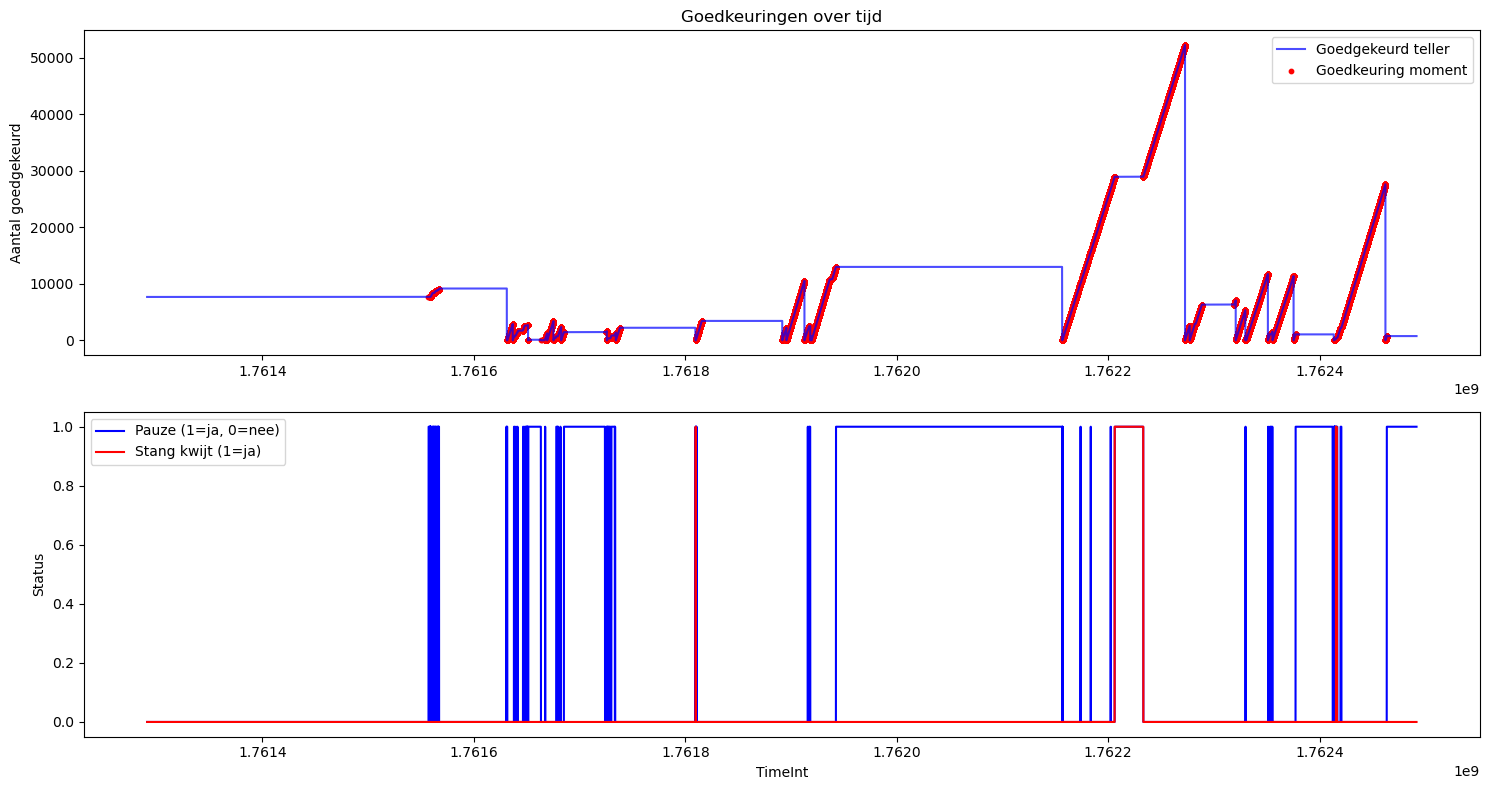

In [58]:
# Visualiseer wanneer goedkeuringen plaatsvinden
plt.figure(figsize=(15, 8))

# Subplot 1: Goedkeuringen over tijd
plt.subplot(2, 1, 1)
goedkeuring_punten = df['goedgekeurd'].diff() > 0
plt.plot(df['TimeInt'], df['goedgekeurd'], 'b-', alpha=0.7, label='Goedgekeurd teller')
plt.scatter(df['TimeInt'][goedkeuring_punten], df['goedgekeurd'][goedkeuring_punten], 
           color='red', s=10, label='Goedkeuring moment')
plt.ylabel('Aantal goedgekeurd')
plt.legend()
plt.title('Goedkeuringen over tijd')

# Subplot 2: Machine status
plt.subplot(2, 1, 2)
if 'Pauze' in df.columns:
    plt.plot(df['TimeInt'], df['Pauze'], 'b-', label='Pauze (1=ja, 0=nee)')
if 'stang_kwijt' in df.columns:
    plt.plot(df['TimeInt'], df['stang_kwijt'], 'r-', label='Stang kwijt (1=ja)')
plt.xlabel('TimeInt')
plt.ylabel('Status')
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Voorbereiding
X = df[features].fillna(0)
y = df['target_goedkeuring_komend']

# Split chronologisch
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nBELANGRIJKSTE FEATURES VOOR GOEDKEURING VOORSPELLING:")
print(importance)

# Voorspellingen
y_pred = model.predict(X_test)

# Evalueer
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"\nResultaten:")
print(f"Accuraatheid: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precisie: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")

Train: (272797, 6), Test: (68200, 6)

BELANGRIJKSTE FEATURES VOOR GOEDKEURING VOORSPELLING:
                  feature  importance
3  tijd_sinds_goedkeuring    0.600916
5          productietempo    0.226109
4           totaal_aantal    0.084570
2              knipteller    0.044951
0                   Pauze    0.036058
1             stang_kwijt    0.007396

Resultaten:
Accuraatheid: 0.721
Precisie: 0.687
Recall: 0.998


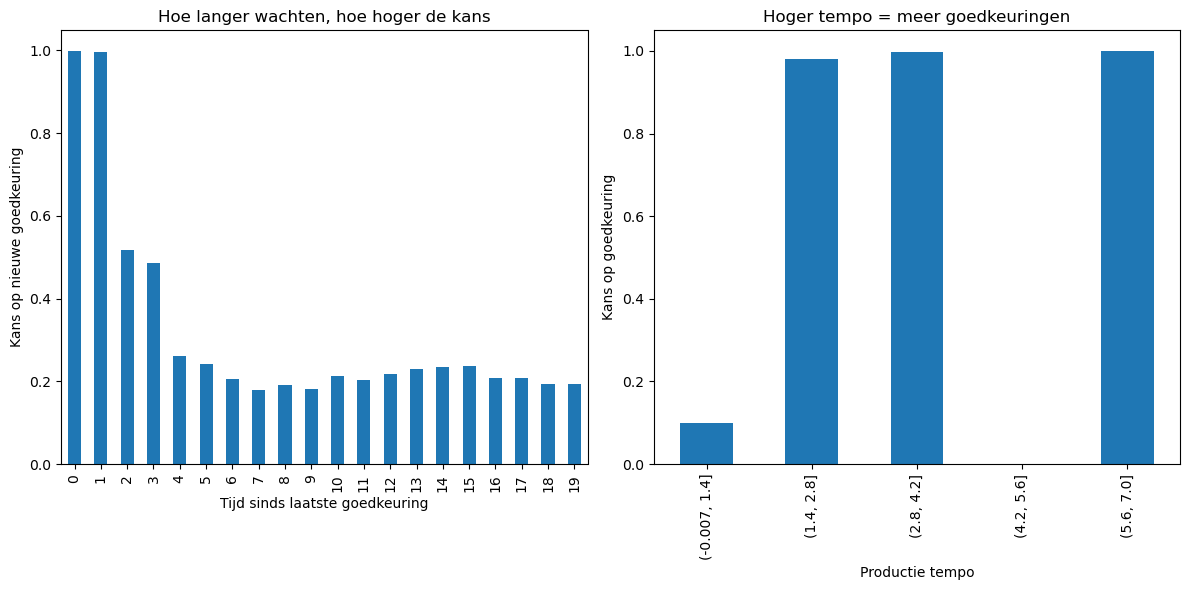

In [60]:
# Visualiseer de belangrijkste relatie
plt.figure(figsize=(12, 6))

# Plot: tijd sinds goedkeuring vs kans op nieuwe goedkeuring
plt.subplot(1, 2, 1)
# Groepeer per tijd sinds laatste goedkeuring
grouped = df.groupby('tijd_sinds_goedkeuring')['target_goedkeuring_komend'].mean()
grouped.head(20).plot(kind='bar')  # eerste 20 waarden
plt.xlabel('Tijd sinds laatste goedkeuring')
plt.ylabel('Kans op nieuwe goedkeuring')
plt.title('Hoe langer wachten, hoe hoger de kans')

# Plot: productietempo vs goedkeuringen
plt.subplot(1, 2, 2)
if 'productietempo' in df.columns:
    tempo_groups = pd.cut(df['productietempo'], bins=5)
    tempo_approval = df.groupby(tempo_groups)['target_goedkeuring_komend'].mean()
    tempo_approval.plot(kind='bar')
    plt.xlabel('Productie tempo')
    plt.ylabel('Kans op goedkeuring')
    plt.title('Hoger tempo = meer goedkeuringen')

plt.tight_layout()
plt.show()

# Quality

In [61]:
# STAP 1: Identificeer kwaliteits-signalen
print("=== KWALITEITS PREDICTIVE MAINTENANCE ===")

# We moeten eerst begrijpen: wat definieert een "slechte spaak"?
# Mogelijke indicatoren in je data:
print("Mogelijke kwaliteits-indicatoren:")
kwaliteit_cols = []
for col in df.columns:
    col_lower = col.lower()
    if any(term in col_lower for term in ['correctie', 'offset', 'afwijking', 'tolerantie', 'deviatie', 'variatie']):
        kwaliteit_cols.append(col)
        print(f"  - {col}")

print(f"\nGevonden kwaliteits-kolommen: {kwaliteit_cols}")

=== KWALITEITS PREDICTIVE MAINTENANCE ===
Mogelijke kwaliteits-indicatoren:
  - StangData.Correctie_Totale_lengte
  - StangData.Correctie_Totale_lengte_operator_trek1en3
  - StangData.Offset_knipklem_knippositie_Operator
  - Wisselblok_settings[6].Wp1_diameter_offset
  - Wisselblok_settings[6].Wp1_hartlijn_offset
  - Wisselblok_settings[6].Wp2_diameter_offset
  - Wisselblok_settings[6].Wp2_hartlijn_offset
  - d_hor_offset
  - d_vert_offset

Gevonden kwaliteits-kolommen: ['StangData.Correctie_Totale_lengte', 'StangData.Correctie_Totale_lengte_operator_trek1en3', 'StangData.Offset_knipklem_knippositie_Operator', 'Wisselblok_settings[6].Wp1_diameter_offset', 'Wisselblok_settings[6].Wp1_hartlijn_offset', 'Wisselblok_settings[6].Wp2_diameter_offset', 'Wisselblok_settings[6].Wp2_hartlijn_offset', 'd_hor_offset', 'd_vert_offset']


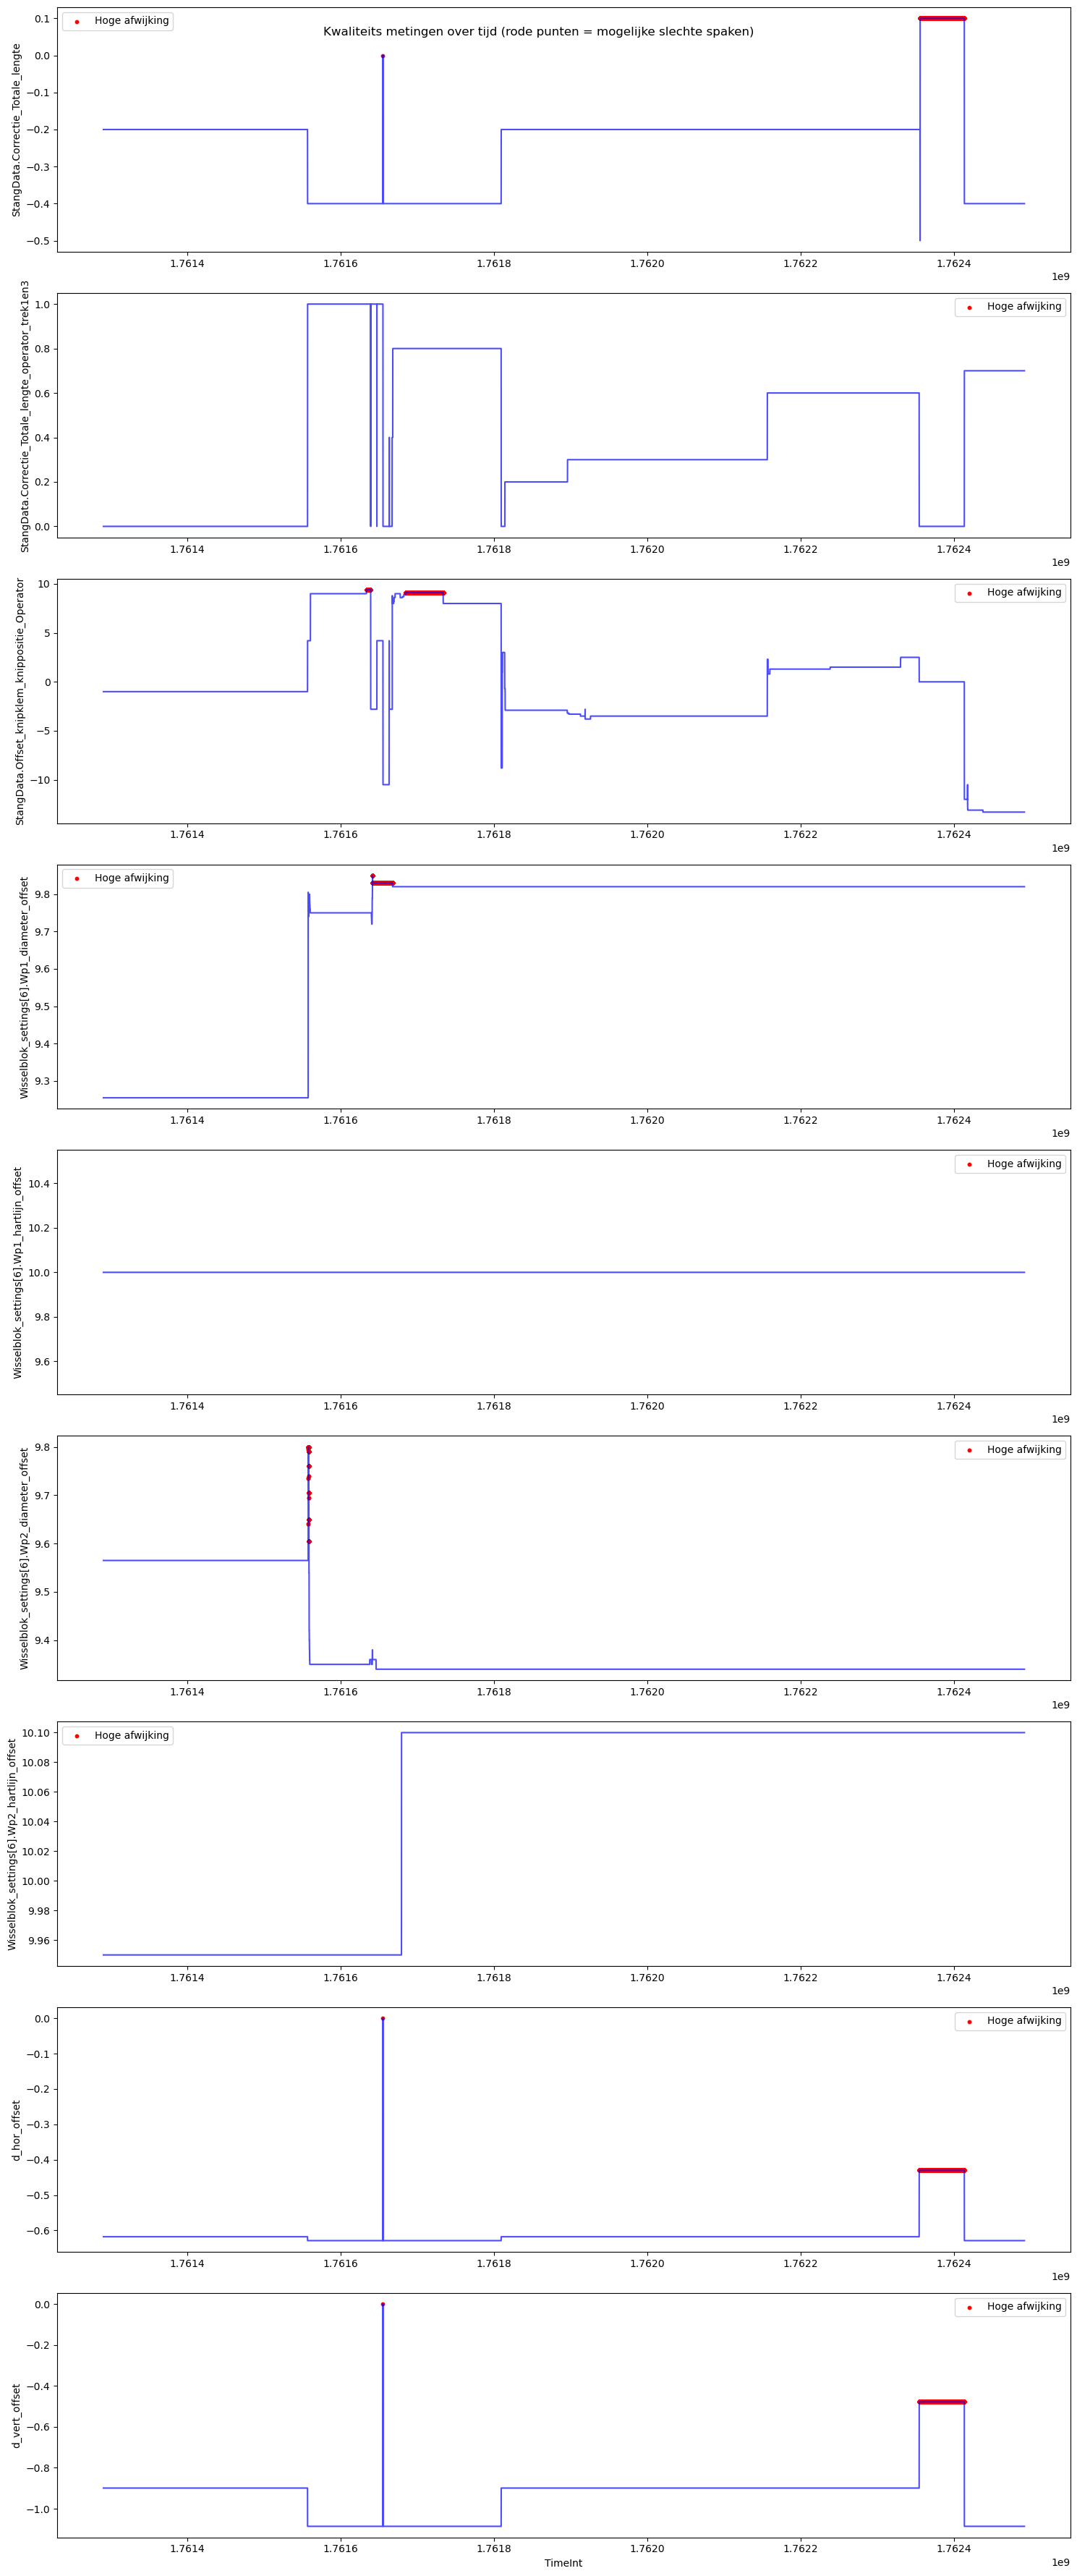

Aantal mogelijke slechte spaken: 1638 (0.48%)
Aantal voorspellingen voor slechte spaken: 1733


In [64]:
# STAP 2: Bekijk de kwaliteits-data
if kwaliteit_cols:
    fig, axes = plt.subplots(len(kwaliteit_cols), 1, figsize=(15, 4*len(kwaliteit_cols)))
    if len(kwaliteit_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(kwaliteit_cols):
        axes[i].plot(df['TimeInt'], df[col], 'b-', alpha=0.7)
        axes[i].set_ylabel(col)
        # Markeer gebieden met hoge afwijkingen
        threshold = df[col].quantile(0.95)  #bovenste 5% als "slecht"
        hoge_afwijking = df[col] > threshold
        axes[i].scatter(df['TimeInt'][hoge_afwijking], df[col][hoge_afwijking], 
                       color='red', s=10, label='Hoge afwijking')
        axes[i].legend()
    
    axes[-1].set_xlabel('TimeInt')
    plt.suptitle('Kwaliteits metingen over tijd (rode punten = mogelijke slechte spaken)')
    plt.tight_layout()
    plt.show()

# STAP 3: Definieer "slechte spaak" target
# Een spaak is slecht als een kwaliteitsmeting buiten tolerantie valt
df['target_slechte_spaak'] = 0

if kwaliteit_cols:
    # Methode 1: Combinatie van afwijkingen
    for col in kwaliteit_cols:
        # Bepaal tolerantie grenzen (bijv. bovenste 2% = slecht)
        upper_limit = df[col].quantile(0.98)
        lower_limit = df[col].quantile(0.02)
        
        # Markeer als slecht als buiten tolerantie
        slecht = (df[col] > upper_limit) | (df[col] < lower_limit)
        df.loc[slecht, 'target_slechte_spaak'] = 1
    
    print(f"Aantal mogelijke slechte spaken: {df['target_slechte_spaak'].sum()} ({df['target_slechte_spaak'].mean()*100:.2f}%)")

# STAP 4: Voorspel TOEKOMSTIGE slechte spaken
# Target: komt er binnen 20 metingen een slechte spaak?
df['target_slechte_spaak_komend'] = 0

for i in range(len(df)):
    future_slecht = any(df['target_slechte_spaak'].iloc[i+1:min(i+21, len(df))] == 1)
    df.loc[df.index[i], 'target_slechte_spaak_komend'] = 1 if future_slecht else 0

print(f"Aantal voorspellingen voor slechte spaken: {df['target_slechte_spaak_komend'].sum()}")

In [65]:
# STAP 5: Maak features die kwaliteitsverslechtering voorspellen
kwaliteit_features = []

# 1. Trend in kwaliteitsmetingen
for col in kwaliteit_cols:
    # Rolling statistics voor trends
    df[f'{col}_trend'] = df[col].rolling(window=15).mean().diff()  # richting
    df[f'{col}_variabiliteit'] = df[col].rolling(window=15).std()  # stabiliteit
    df[f'{col}_boven_norm'] = (df[col] > df[col].quantile(0.9)).astype(int)  # uitbijters
    
    kwaliteit_features.extend([f'{col}_trend', f'{col}_variabiliteit', f'{col}_boven_norm'])

# 2. Machine status impact op kwaliteit
if 'Pauze' in df.columns:
    df['pauze_effect'] = df['Pauze'].rolling(window=10).mean()
    kwaliteit_features.append('pauze_effect')

# 3. Productie tempo vs kwaliteit
if 'knipteller' in df.columns:
    df['kniptempo_var'] = df['knipteller'].diff().rolling(window=20).std()
    df['snelheids_verandering'] = df['knipteller'].diff().diff().abs()
    kwaliteit_features.extend(['kniptempo_var', 'snelheids_verandering'])

# 4. Historische kwaliteit patronen
df['recente_slechte_spaken'] = df['target_slechte_spaak'].rolling(window=50).sum()
df['tijd_sinds_slechte_spaak'] = 0
last_bad = 0
for i in range(len(df)):
    if df['target_slechte_spaak'].iloc[i] == 1:
        last_bad = 0
    else:
        last_bad += 1
    df.loc[df.index[i], 'tijd_sinds_slechte_spaak'] = last_bad

kwaliteit_features.extend(['recente_slechte_spaken', 'tijd_sinds_slechte_spaak'])

print(f"\nKwaliteit features: {len(kwaliteit_features)}")


Kwaliteit features: 32


In [67]:
# STAP 6: Train model om slechte spaken te voorspellen
if 'target_slechte_spaak_komend' in df.columns and len(kwaliteit_features) > 0:
    X_qual = df[kwaliteit_features].fillna(0)
    y_qual = df['target_slechte_spaak_komend']
    
    # Chronologische split
    split_idx = int(0.8 * len(X_qual))
    X_train_qual, X_test_qual = X_qual[:split_idx], X_qual[split_idx:]
    y_train_qual, y_test_qual = y_qual[:split_idx], y_qual[split_idx:]
    
    print(f"Kwaliteit Model - Train: {X_train_qual.shape}, Test: {X_test_qual.shape}")
    print(f"Slechte spaken in training: {y_train_qual.sum()}, in test: {y_test_qual.sum()}")
    
    # Train model met class weights (omdat slechte spaken zeldzaam zijn)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix
    
    model_qual = RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced',
        max_depth=10
    )
    model_qual.fit(X_train_qual, y_train_qual)
    
    # Feature importance
    importance_qual = pd.DataFrame({
        'feature': kwaliteit_features,
        'importance': model_qual.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n🎯 KWALITEITS VOORSPELLING - BELANGRIJKSTE FEATURES:")
    print(importance_qual.head(10))
    
    # Voorspellingen
    y_pred_qual = model_qual.predict(X_test_qual)
    y_pred_proba = model_qual.predict_proba(X_test_qual)[:, 1]
    
    # Evalueer
    print(f"\n🎯 KWALITEITS PREDICTIVE MAINTENANCE RESULTATEN:")
    print(classification_report(y_test_qual, y_pred_qual))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_qual, y_pred_qual)
    print(f"Confusion Matrix:\n{cm}")

Kwaliteit Model - Train: (272797, 32), Test: (68200, 32)
Slechte spaken in training: 1668, in test: 65

🎯 KWALITEITS VOORSPELLING - BELANGRIJKSTE FEATURES:
                                              feature  importance
31                           tijd_sinds_slechte_spaak    0.286231
30                             recente_slechte_spaken    0.264897
5   StangData.Correctie_Totale_lengte_operator_tre...    0.214340
28                                      kniptempo_var    0.081948
8   StangData.Offset_knipklem_knippositie_Operator...    0.062413
17  Wisselblok_settings[6].Wp2_diameter_offset_bov...    0.043816
29                              snelheids_verandering    0.012924
27                                       pauze_effect    0.012591
9    Wisselblok_settings[6].Wp1_diameter_offset_trend    0.005892
10  Wisselblok_settings[6].Wp1_diameter_offset_var...    0.005792

🎯 KWALITEITS PREDICTIVE MAINTENANCE RESULTATEN:
              precision    recall  f1-score   support

           0  

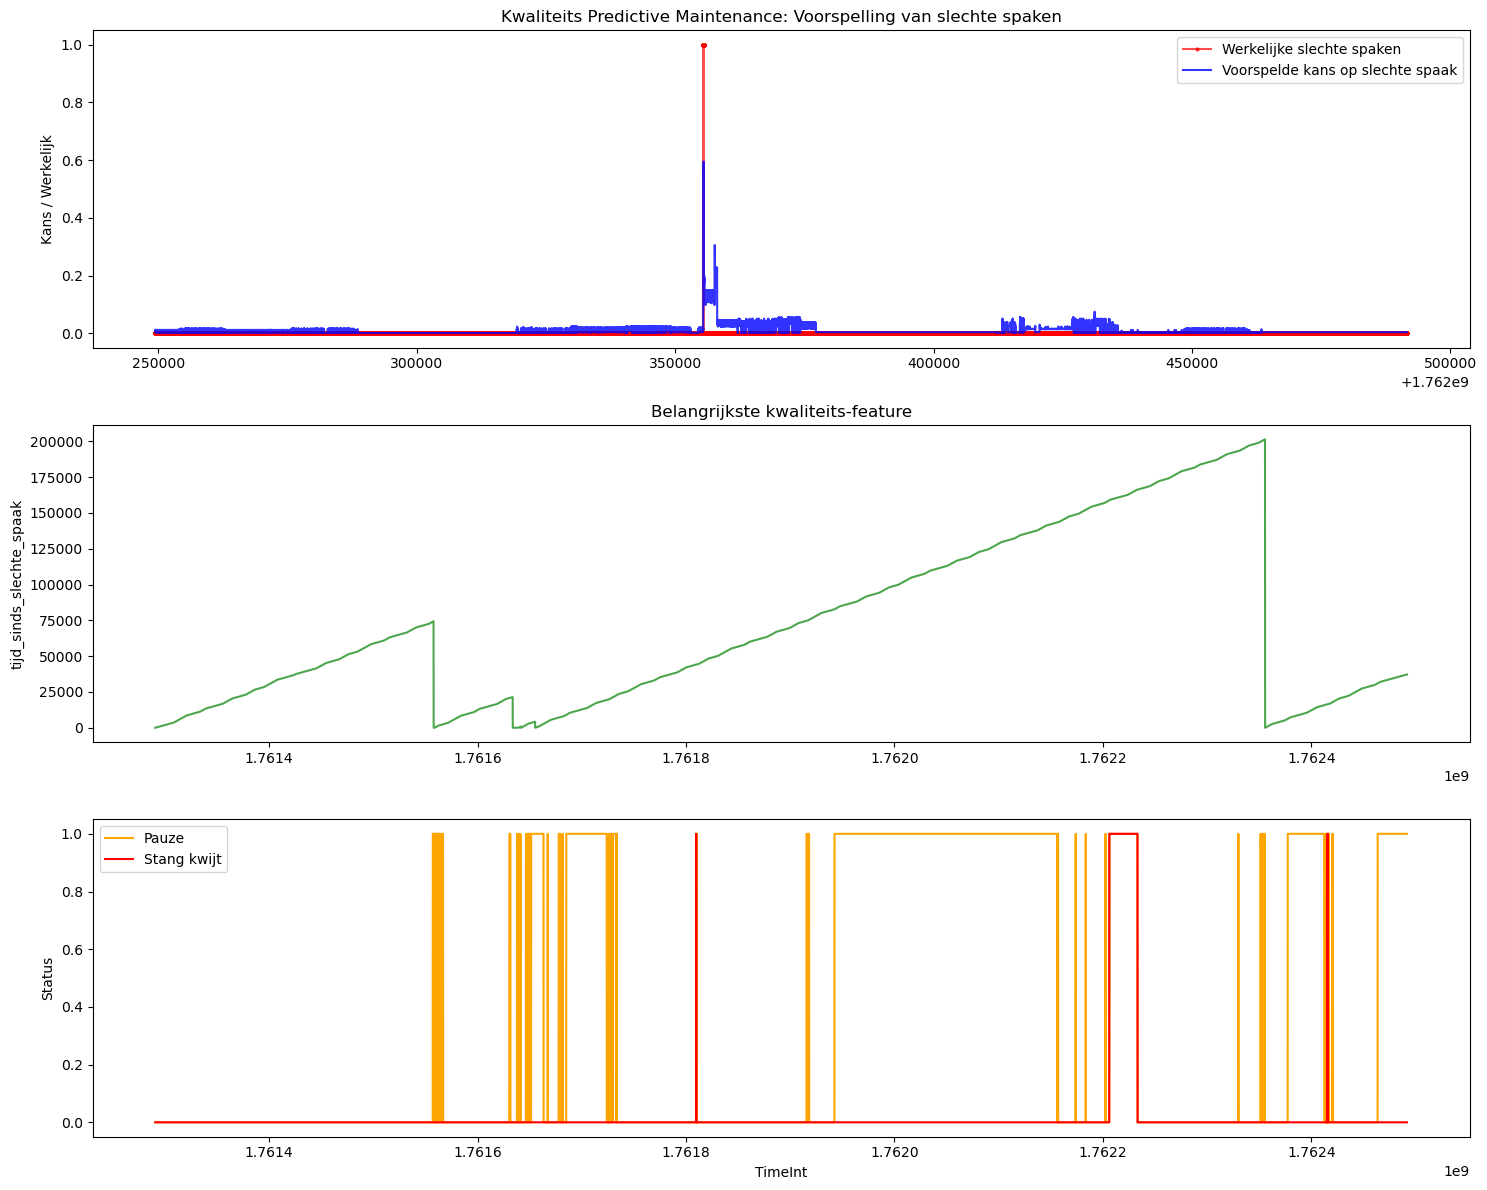

In [68]:
# STAP 7: Visualiseer wanneer slechte spaken voorspeld worden
plt.figure(figsize=(15, 12))

# Plot 1: Werkelijke vs voorspelde slechte spaken
plt.subplot(3, 1, 1)
# Toon alleen test data voor visualisatie
test_indices = range(split_idx, len(df))
plt.plot(df['TimeInt'].iloc[test_indices], y_test_qual.values, 'ro-', markersize=2, label='Werkelijke slechte spaken', alpha=0.7)
plt.plot(df['TimeInt'].iloc[test_indices], y_pred_proba, 'b-', label='Voorspelde kans op slechte spaak', alpha=0.8)
plt.ylabel('Kans / Werkelijk')
plt.title('Kwaliteits Predictive Maintenance: Voorspelling van slechte spaken')
plt.legend()

# Plot 2: Belangrijkste kwaliteits feature
if len(kwaliteit_features) > 0:
    belangrijkste = importance_qual.iloc[0]['feature']
    plt.subplot(3, 1, 2)
    plt.plot(df['TimeInt'], df[belangrijkste], 'g-', alpha=0.7)
    plt.ylabel(belangrijkste)
    plt.title('Belangrijkste kwaliteits-feature')

# Plot 3: Machine status
plt.subplot(3, 1, 3)
if 'Pauze' in df.columns:
    plt.plot(df['TimeInt'], df['Pauze'], 'orange', label='Pauze')
if 'stang_kwijt' in df.columns:
    plt.plot(df['TimeInt'], df['stang_kwijt'], 'red', label='Stang kwijt')
plt.xlabel('TimeInt')
plt.ylabel('Status')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Create synthetic EWON-like test data
data = {
    "cycle_id": range(1, 16),
    "torque": [10, 11, 10, 13, 12, 11, 10, 10, 14, 15, 15, 15,  9, 10, 11],
    "speed":  [100, 101, 100, 103, 102, 101, 100, 100, 104, 105, 105, 105, 95, 96, 97],
    "approved_counter": [1, 2, 2, 3, 4, 4, 4, 5, 7, 7, 7, 8, 0, 1, 2]  # includes pauses + jumps + reset
}

df = pd.DataFrame(data)

# Step 1: compute delta
df["delta"] = df["approved_counter"].diff().fillna(df["approved_counter"])

# Step 2: assign binary target
def assign_target(delta):
    if delta > 0:
        return 1   # OK cycle
    elif delta == 0:
        return None  # pause / duplicate, remove later
    else:
        return None  # reset, remove
    
df["binary_target"] = df["delta"].apply(assign_target)

# Step 3: cleaned dataset
clean_df = df.dropna(subset=["binary_target"]).reset_index(drop=True)

df, clean_df


(    cycle_id  torque  speed  approved_counter  delta  binary_target
 0          1      10    100                 1    1.0            1.0
 1          2      11    101                 2    1.0            1.0
 2          3      10    100                 2    0.0            NaN
 3          4      13    103                 3    1.0            1.0
 4          5      12    102                 4    1.0            1.0
 5          6      11    101                 4    0.0            NaN
 6          7      10    100                 4    0.0            NaN
 7          8      10    100                 5    1.0            1.0
 8          9      14    104                 7    2.0            1.0
 9         10      15    105                 7    0.0            NaN
 10        11      15    105                 7    0.0            NaN
 11        12      15    105                 8    1.0            1.0
 12        13       9     95                 0   -8.0            NaN
 13        14      10     96      